In [1]:
# Set project root
import os
os.chdir('/home/jovyan/work/github_repo')

In [2]:
from Utils.Data.Data import get_dataset, get_dictionary_array, get_csr_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 110

# Matrix description

### This matrix is in csr format.
The matrix M contains the number of time a user has been involved with a language L.
The count has been done in this way:
- Every time the user U has created a tweet with language L, M[U,L] += 1
- Every time the user has engaged a tweet with language L, M[U,L] += 1

Let's remember that: <br>
Language 0 -> Japanese <br>
Language 1 -> Not detected <br>
Language 2 -> Portogues <br>
Language 3 -> English <br>
Language 4 -> Spanish <br>
Language 5 -> Korean <br>

In [3]:
%%time
csr_matrix = get_csr_matrix("tweet_language_csr_matrix")

CPU times: user 1.81 s, sys: 68.4 ms, total: 1.88 s
Wall time: 1.87 s


## When users are multilingual which are the the most popular languages

### Let's load some data
The following matrix has been described previou

In [4]:
%%time
df = pd.DataFrame.sparse.from_spmatrix(csr_matrix)
languages = df.columns
df

CPU times: user 2.48 s, sys: 347 ms, total: 2.83 s
Wall time: 2.82 s


,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,18,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,22,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,48,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33809389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33809390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33809391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33809392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
count_columns = [f'count_language_{language}_occurence' for language in languages]
df.columns = [f'count_language_{language}_occurence' for language in languages]
df[count_columns]

,count_language_0_occurence,count_language_1_occurence,count_language_2_occurence,count_language_3_occurence,count_language_4_occurence,count_language_5_occurence,count_language_6_occurence,count_language_7_occurence,count_language_8_occurence,count_language_9_occurence,...,count_language_56_occurence,count_language_57_occurence,count_language_58_occurence,count_language_59_occurence,count_language_60_occurence,count_language_61_occurence,count_language_62_occurence,count_language_63_occurence,count_language_64_occurence,count_language_65_occurence
0,18,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,22,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,48,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33809389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33809390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33809391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33809392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
%%time
know_language_columns = [f'know_language_{language}' for language in languages]
for language in languages:   
    df[f'know_language_{language}'] = df[f'count_language_{language}_occurence'] > 0
df[know_language_columns]

CPU times: user 230 ms, sys: 12.8 ms, total: 242 ms
Wall time: 239 ms


,know_language_0,know_language_1,know_language_2,know_language_3,know_language_4,know_language_5,know_language_6,know_language_7,know_language_8,know_language_9,...,know_language_56,know_language_57,know_language_58,know_language_59,know_language_60,know_language_61,know_language_62,know_language_63,know_language_64,know_language_65
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33809389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33809390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33809391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33809392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['total_count_language_occurence'] = df[count_columns].sum(axis=1)
df['total_count_language_occurence']

In [7]:
df['total_known_language'] = df[know_language_columns].sum(axis=1)
df['total_known_language']

0           2
1           3
2           2
3           1
4           2
           ..
33809389    0
33809390    0
33809391    0
33809392    0
33809393    0
Name: total_known_language, Length: 33809394, dtype: int64

### How many languages does users know?
(The results are sorted)

Text(0, 0.5, 'known languages')

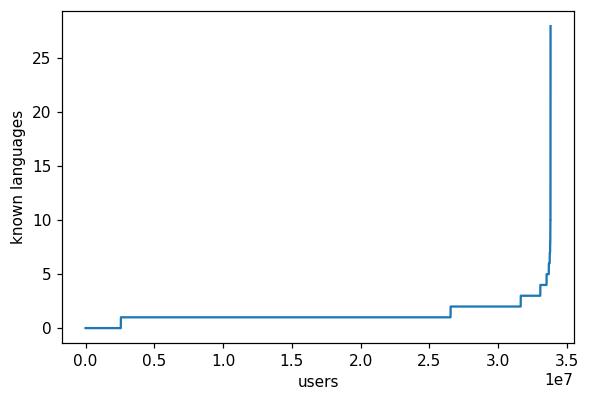

In [8]:
plt.plot(df['total_known_language'].sort_values().values)
plt.xlabel("users")
plt.ylabel("known languages")

In [9]:
%%time
sum_df = df.sum()

CPU times: user 13min 57s, sys: 2min 27s, total: 16min 25s
Wall time: 16min 23s


In [10]:
sum_df_know_language = sum_df[know_language_columns]
sum_df_count_occurence = sum_df[count_columns]

### How many users know a certain language?

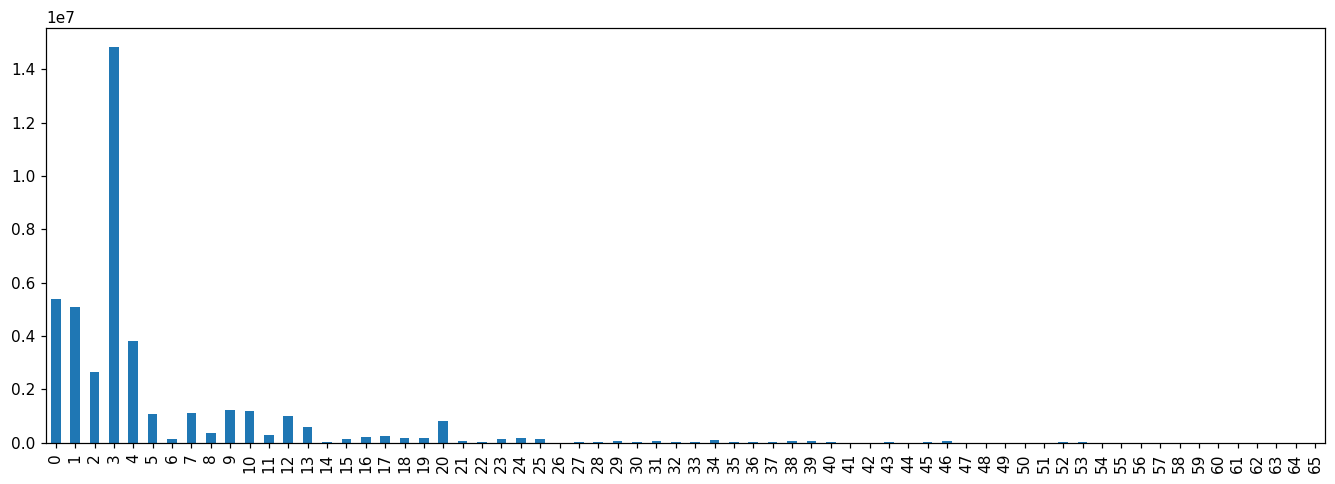

In [11]:
plt.rcParams['figure.figsize'] = [15, 5]
sum_df_know_language.index = languages
sum_df_know_language.plot(kind='bar')

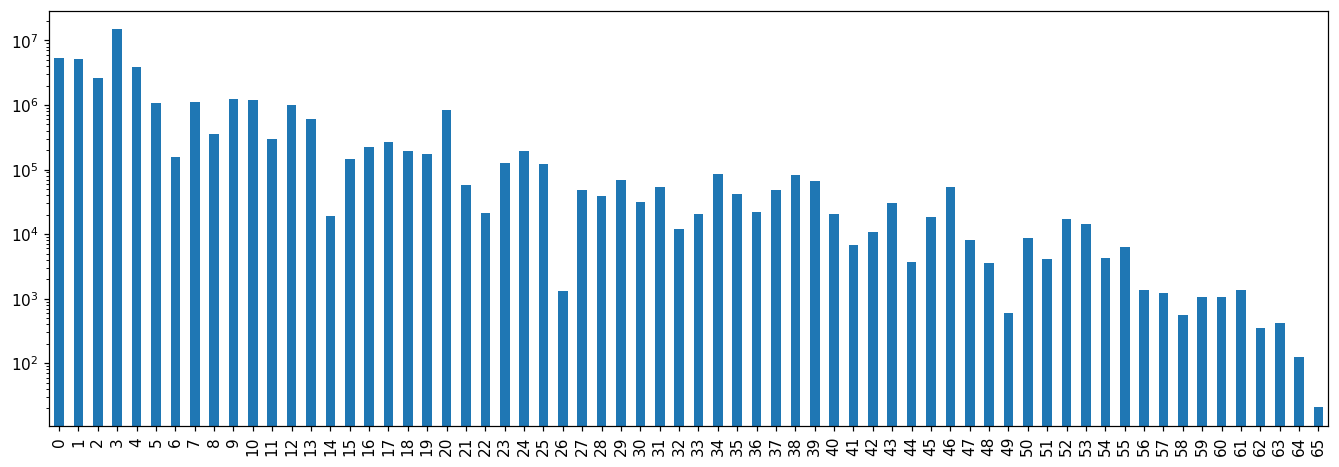

In [12]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.yscale('log')
sum_df_know_language.index = languages
sum_df_know_language.plot(kind='bar')

### How many times the language has been interacted with?

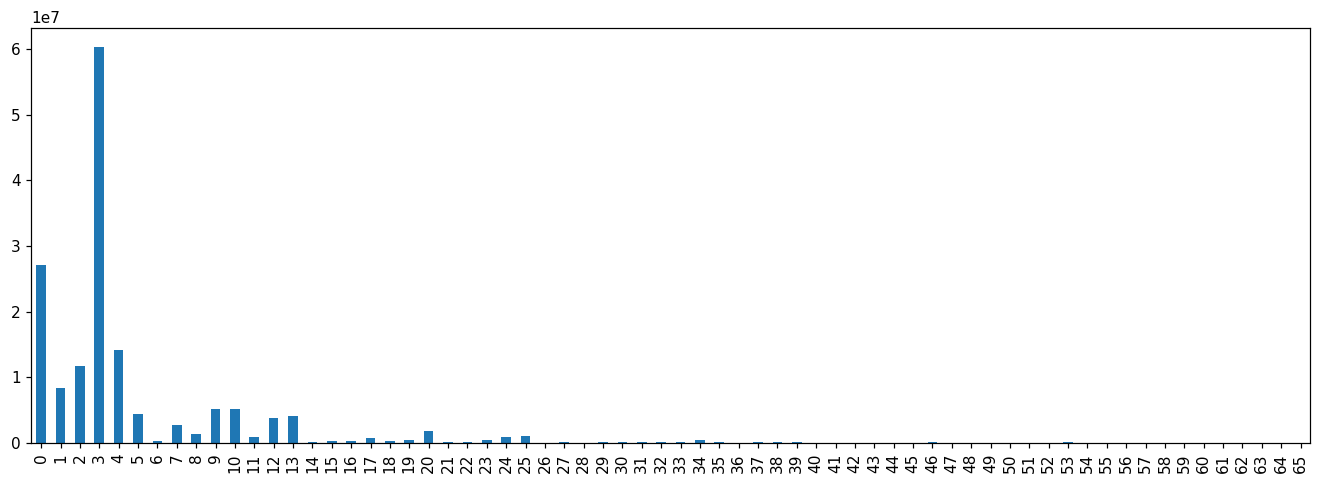

In [13]:
plt.rcParams['figure.figsize'] = [15, 5]
sum_df_count_occurence.index = languages
sum_df_count_occurence.plot(kind='bar')

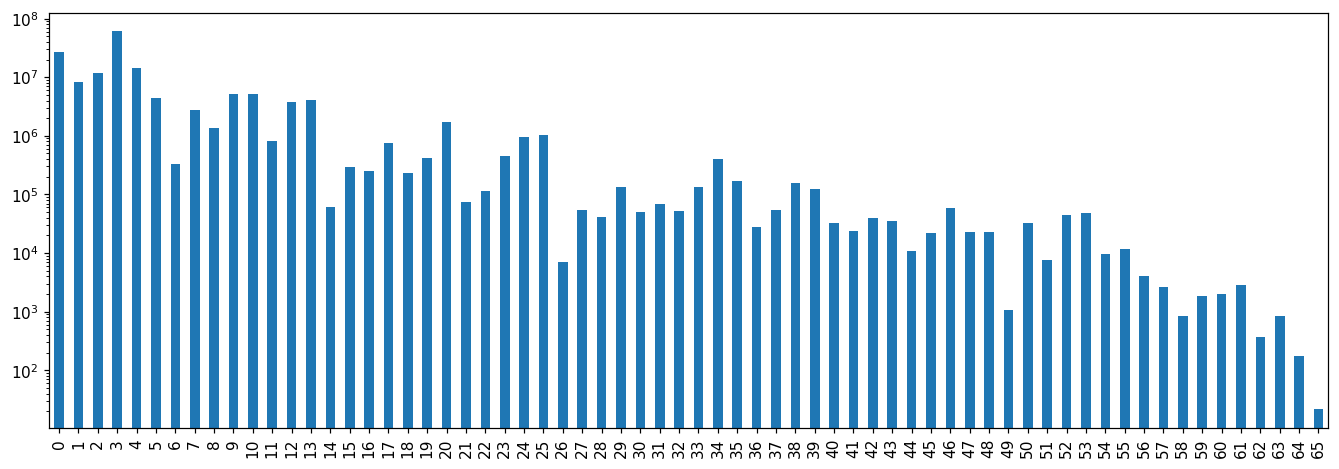

In [14]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.yscale('log')
sum_df_count_occurence.index = languages
sum_df_count_occurence.plot(kind='bar')

# Let's consider the people that know only one language
How many are them? <br>
How many interactions have they made in that language?

know_language_0     4505793.0
know_language_1      841092.0
know_language_2     1589289.0
know_language_3     9706901.0
know_language_4     2463921.0
                      ...    
know_language_61        446.0
know_language_62         31.0
know_language_63        161.0
know_language_64         31.0
know_language_65          2.0
Length: 66, dtype: float64


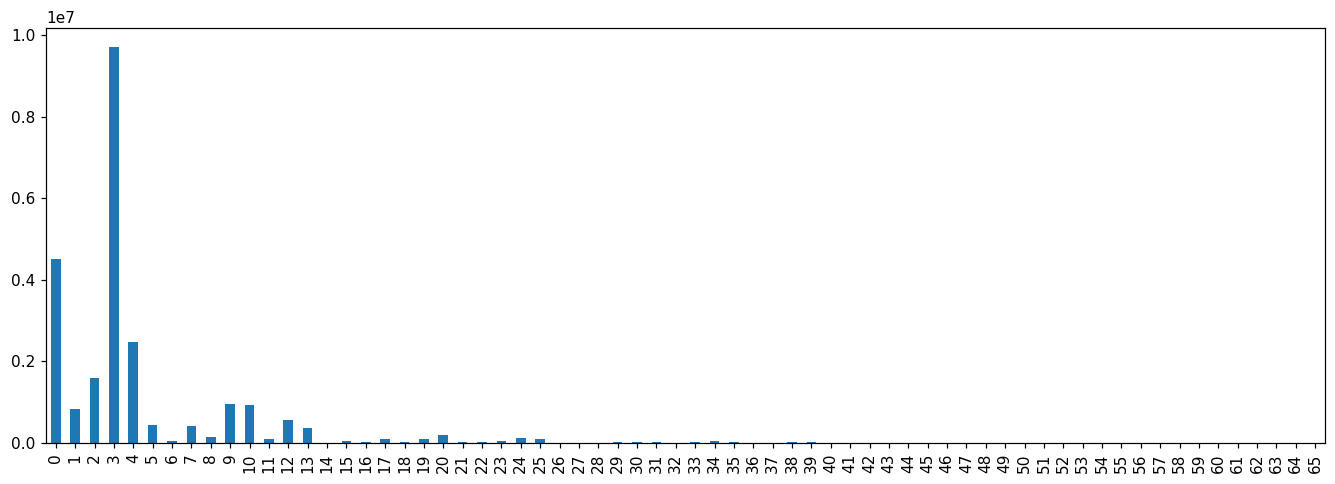

count_language_0_occurence     20260070.0
count_language_1_occurence      1046459.0
count_language_2_occurence      5469072.0
count_language_3_occurence     30831482.0
count_language_4_occurence      7067033.0
                                  ...    
count_language_61_occurence         647.0
count_language_62_occurence          40.0
count_language_63_occurence         297.0
count_language_64_occurence          34.0
count_language_65_occurence           2.0
Length: 66, dtype: float64


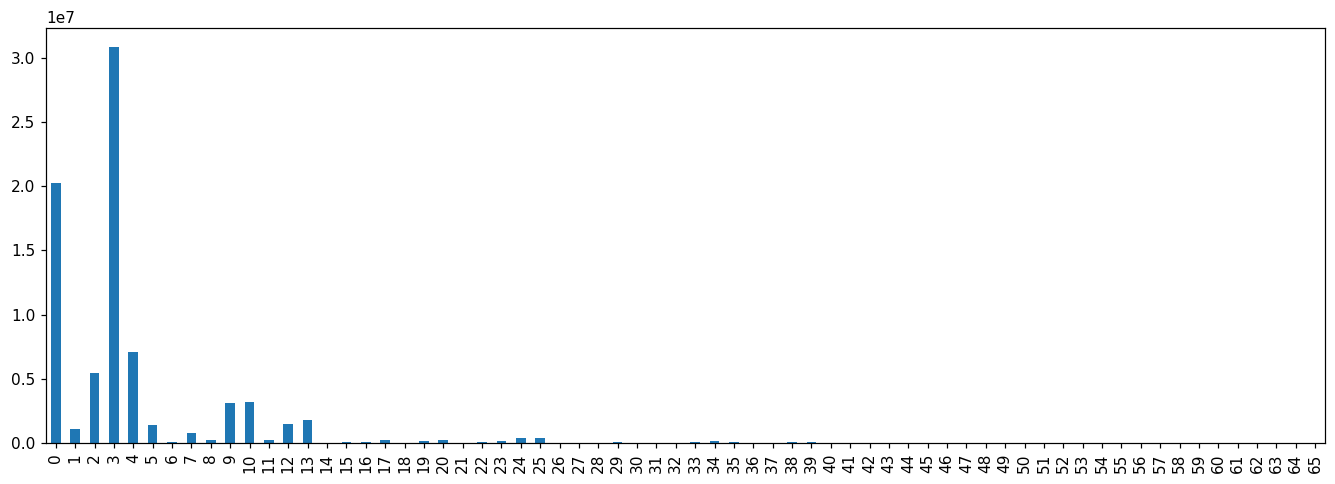

CPU times: user 12min 46s, sys: 1min 42s, total: 14min 28s
Wall time: 14min 27s


In [15]:
%%time
sum_df_user_that_know_1_language = df[df['total_known_language'] == 1].sum()
sum_df_user_that_know_1_know_language = sum_df_user_that_know_1_language[know_language_columns]
sum_df_user_that_know_1_count_occurence = sum_df_user_that_know_1_language[count_columns]
plt.rcParams['figure.figsize'] = [15, 5]
print(sum_df_user_that_know_1_know_language)
sum_df_user_that_know_1_know_language.index = languages
sum_df_user_that_know_1_know_language.plot(kind='bar')
plt.show()
plt.rcParams['figure.figsize'] = [15, 5]
print(sum_df_user_that_know_1_count_occurence)
sum_df_user_that_know_1_count_occurence.index = languages
sum_df_user_that_know_1_count_occurence.plot(kind='bar')
plt.show()

### Plot the percentage uf users that knows only one language with respect to the overall amount of users that know that language
# How to read the following bar chart
~70% of users that know japanese only know japanese (language 0)<br>
~30% of users that know korean only know korean (language 5)

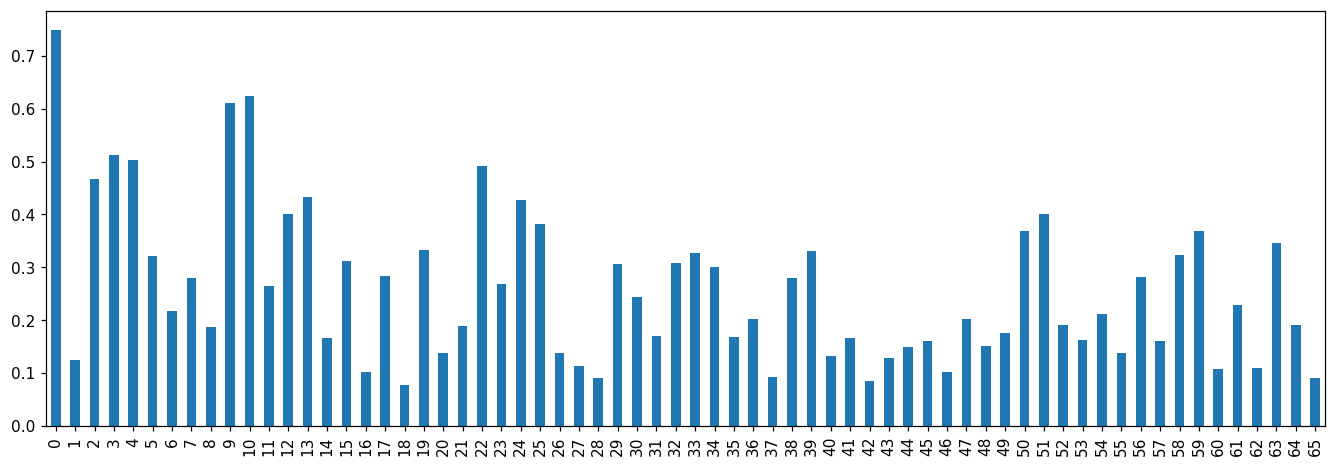

In [27]:
(sum_df_user_that_know_1_count_occurence/sum_df_count_occurence).plot(kind='bar')

# Let's consider only the multilingual users
So just only those ones that have interacted with 2 or more languages

In [16]:
%%time
sum_df_user_that_know_2_or_more_languages = df[df['total_known_language'] >= 2].sum()

CPU times: user 4min 4s, sys: 29.6 s, total: 4min 33s
Wall time: 4min 33s


In [17]:
sum_df_user_that_know_2_or_more_languages_know_language = sum_df_user_that_know_2_or_more_languages[know_language_columns]
sum_df_user_that_know_2_or_more_languages_count_occurence = sum_df_user_that_know_2_or_more_languages[count_columns]

### Among the multilingual, how many users know a certain language?

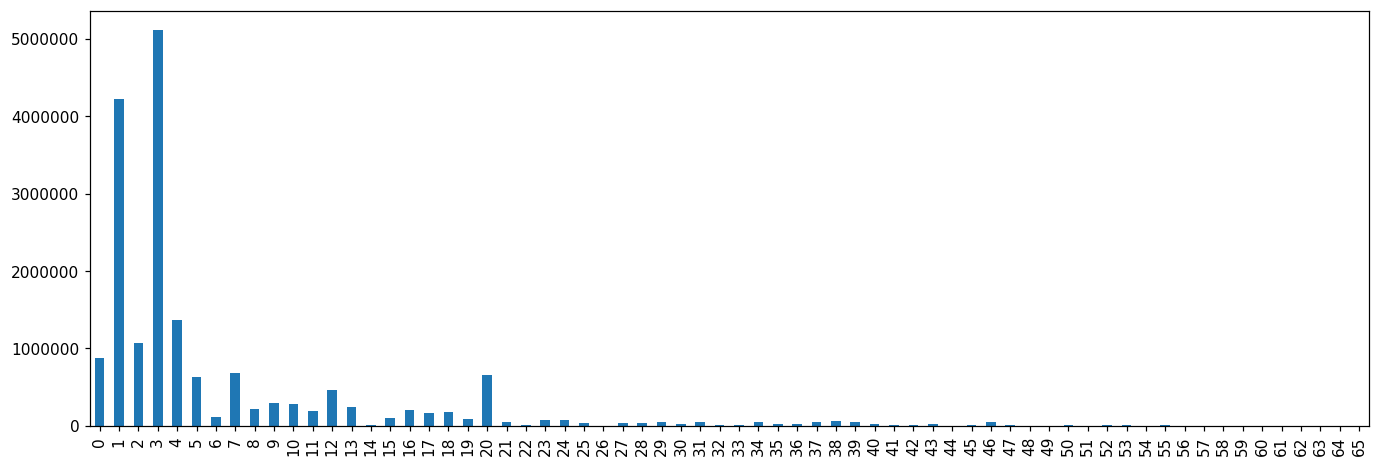

In [18]:
plt.rcParams['figure.figsize'] = [15, 5]
sum_df_user_that_know_2_or_more_languages_know_language.index = languages
sum_df_user_that_know_2_or_more_languages_know_language.plot(kind='bar')

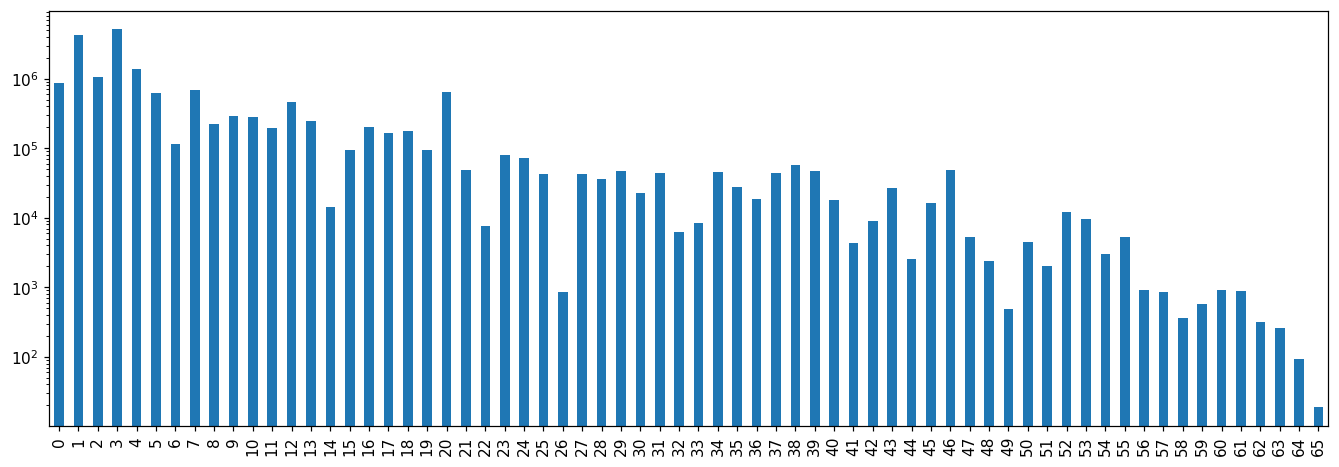

In [19]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.yscale('log')
sum_df_user_that_know_2_or_more_languages_know_language.index = languages
sum_df_user_that_know_2_or_more_languages_know_language.plot(kind='bar')

### Among the multilingual, how many a language has been used?

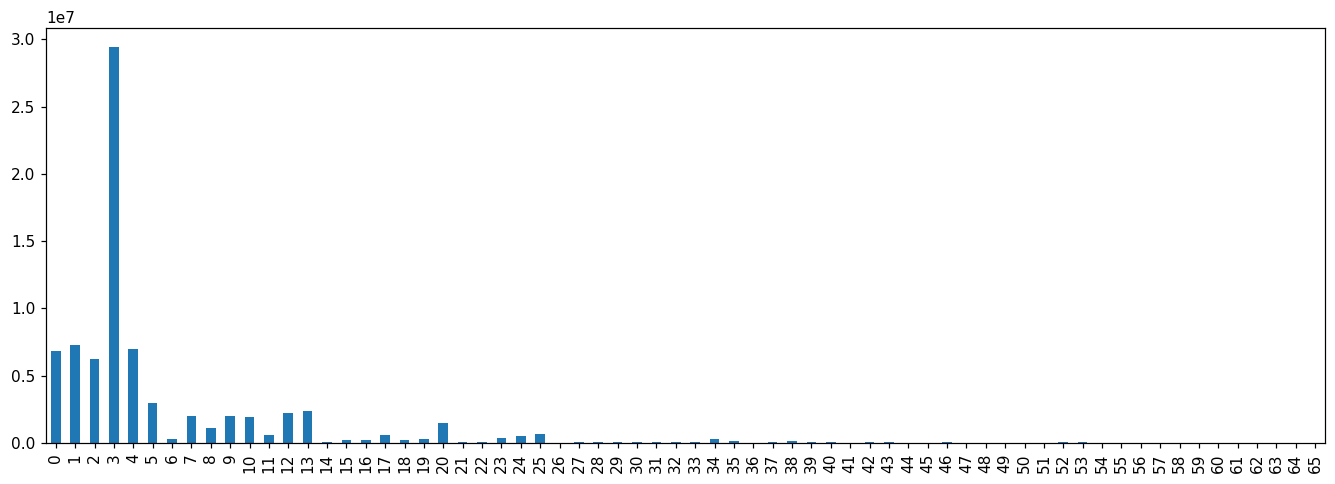

In [20]:
plt.rcParams['figure.figsize'] = [15, 5]
sum_df_user_that_know_2_or_more_languages_count_occurence.index = languages
sum_df_user_that_know_2_or_more_languages_count_occurence.plot(kind='bar')

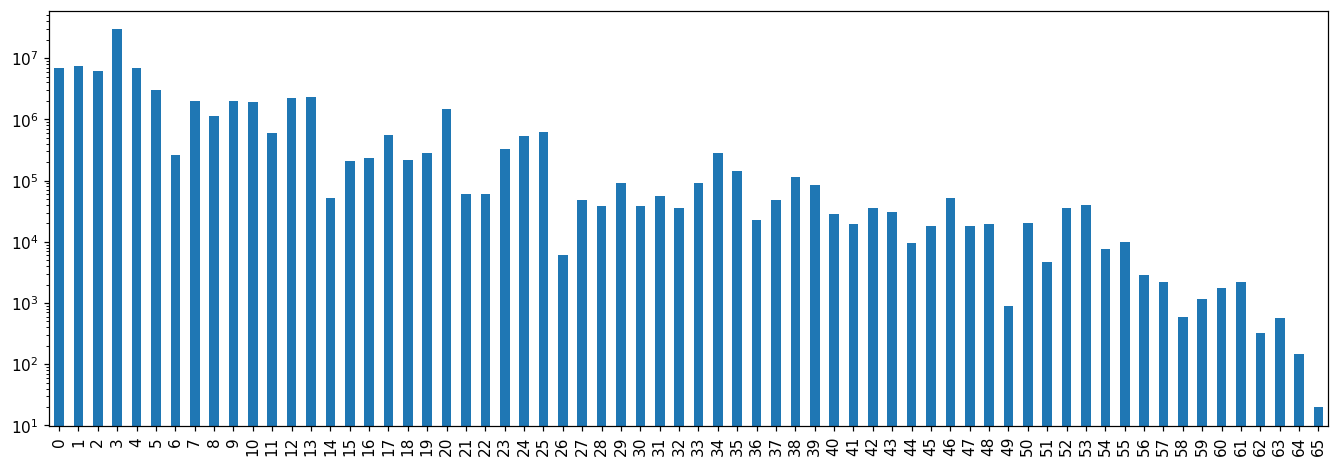

In [21]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.yscale('log')
sum_df_user_that_know_2_or_more_languages_count_occurence.index = languages
sum_df_user_that_know_2_or_more_languages_count_occurence.plot(kind='bar')

### Fix a language, and see what are the other language a user can speak
For example, among those people who can speak English, which are the other language they usually speak?

In [28]:
subset_languages = range(0, 21)
sum_df_language = [None] * len(subset_languages)
sum_df_language_know_language = [None] * len(subset_languages)
sum_df_language_count_occurence = [None] * len(subset_languages)

In [29]:
%%time
for language in subset_languages:
    %time sum_df_language[language] = df[df[f'know_language_{language}'] == True].sum()
    sum_df_language_know_language[language] = sum_df_language[language][know_language_columns]
    sum_df_language_count_occurence[language] = sum_df_language[language][count_columns]

CPU times: user 3min 7s, sys: 24 s, total: 3min 31s
Wall time: 3min 30s
CPU times: user 3min 3s, sys: 17.5 s, total: 3min 20s
Wall time: 3min 20s
CPU times: user 1min 23s, sys: 6.82 s, total: 1min 30s
Wall time: 1min 30s
CPU times: user 9min 5s, sys: 1min 3s, total: 10min 9s
Wall time: 10min 8s
CPU times: user 2min 5s, sys: 10.8 s, total: 2min 16s
Wall time: 2min 15s
CPU times: user 35.9 s, sys: 2.71 s, total: 38.6 s
Wall time: 38.5 s
CPU times: user 5.18 s, sys: 333 ms, total: 5.51 s
Wall time: 5.51 s
CPU times: user 35.3 s, sys: 2.25 s, total: 37.6 s
Wall time: 37.5 s
CPU times: user 12.3 s, sys: 652 ms, total: 12.9 s
Wall time: 12.9 s
CPU times: user 41.3 s, sys: 2.65 s, total: 43.9 s
Wall time: 43.9 s
CPU times: user 37.7 s, sys: 2.58 s, total: 40.3 s
Wall time: 40.3 s
CPU times: user 9.23 s, sys: 485 ms, total: 9.71 s
Wall time: 9.71 s
CPU times: user 31.3 s, sys: 1.98 s, total: 33.3 s
Wall time: 33.2 s
CPU times: user 20.4 s, sys: 1.41 s, total: 21.8 s
Wall time: 21.8 s
CPU times

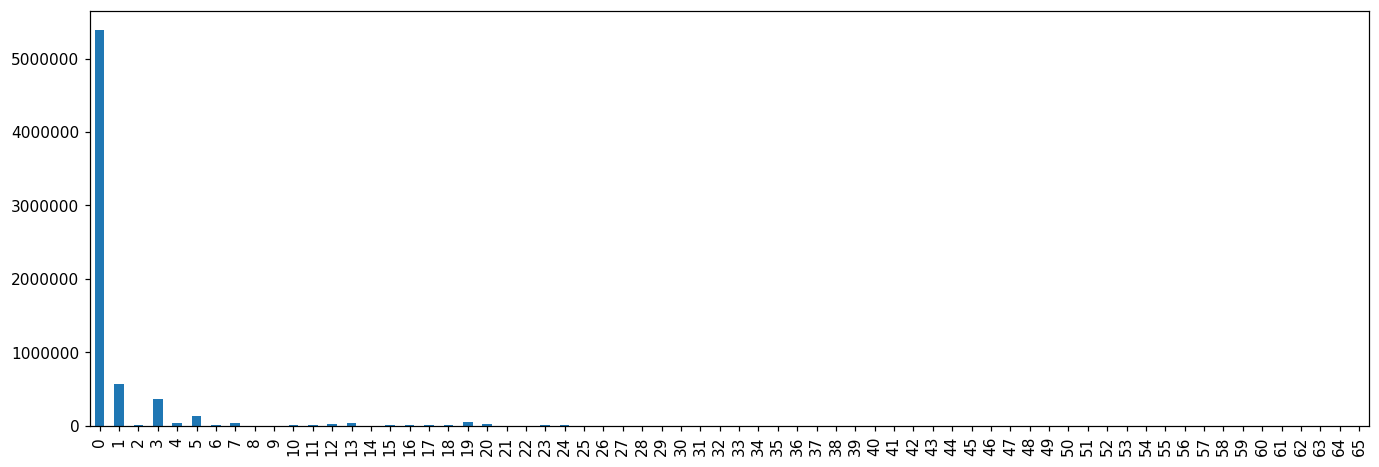

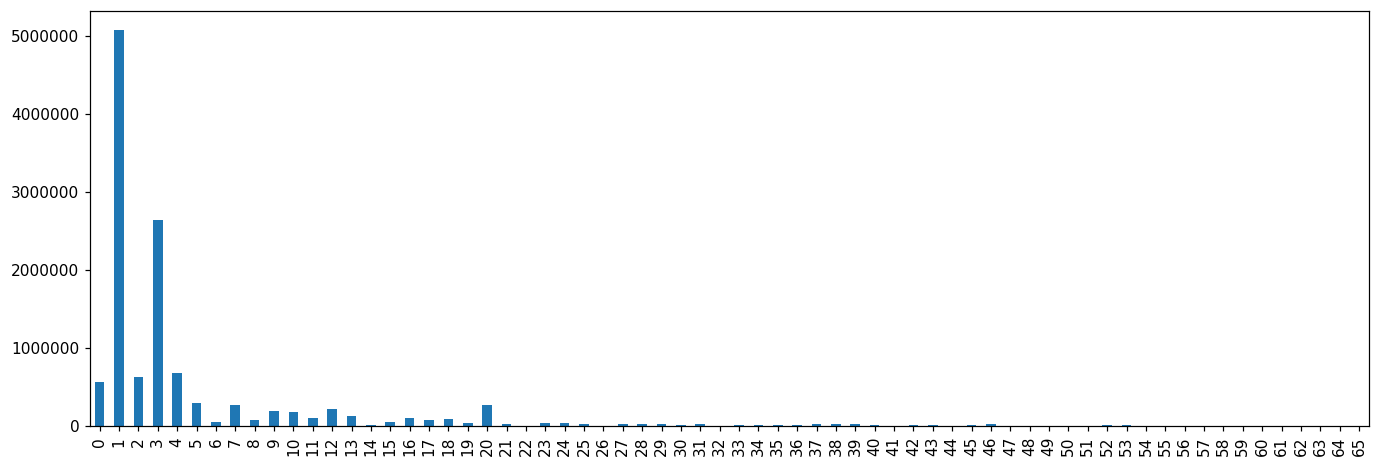

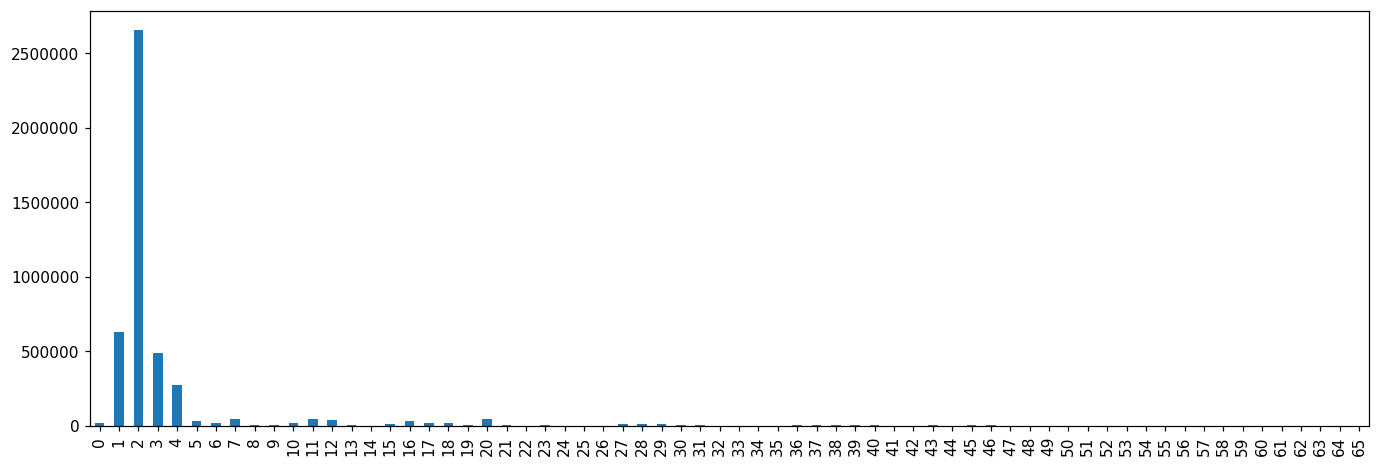

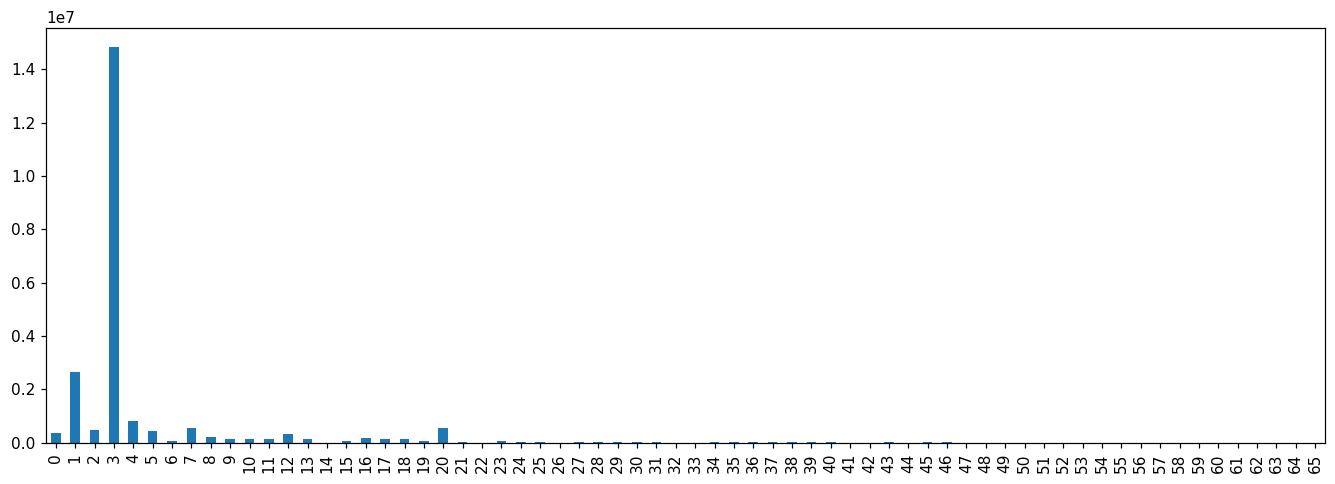

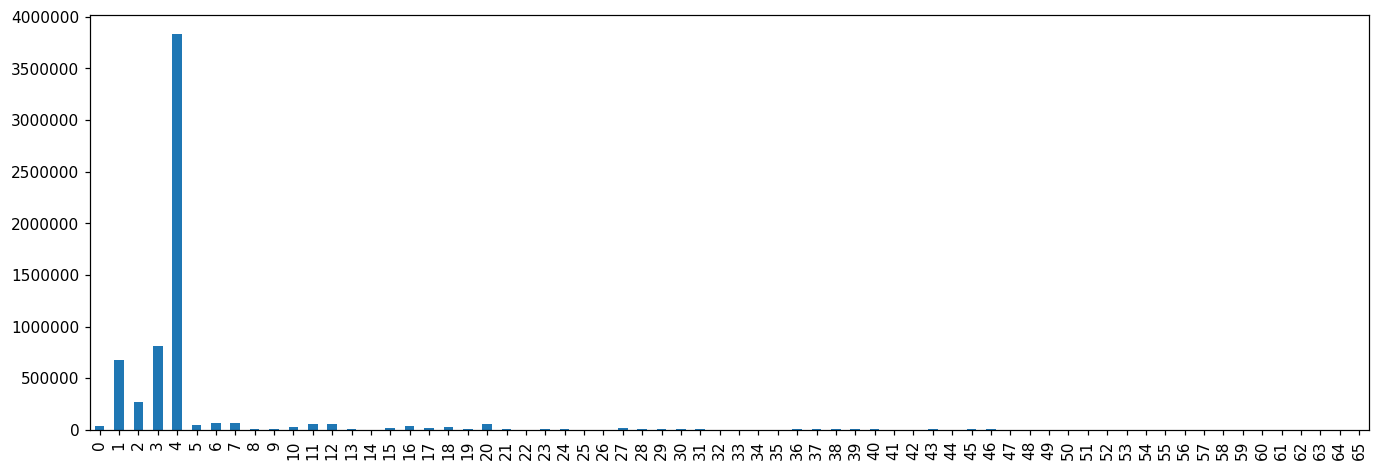

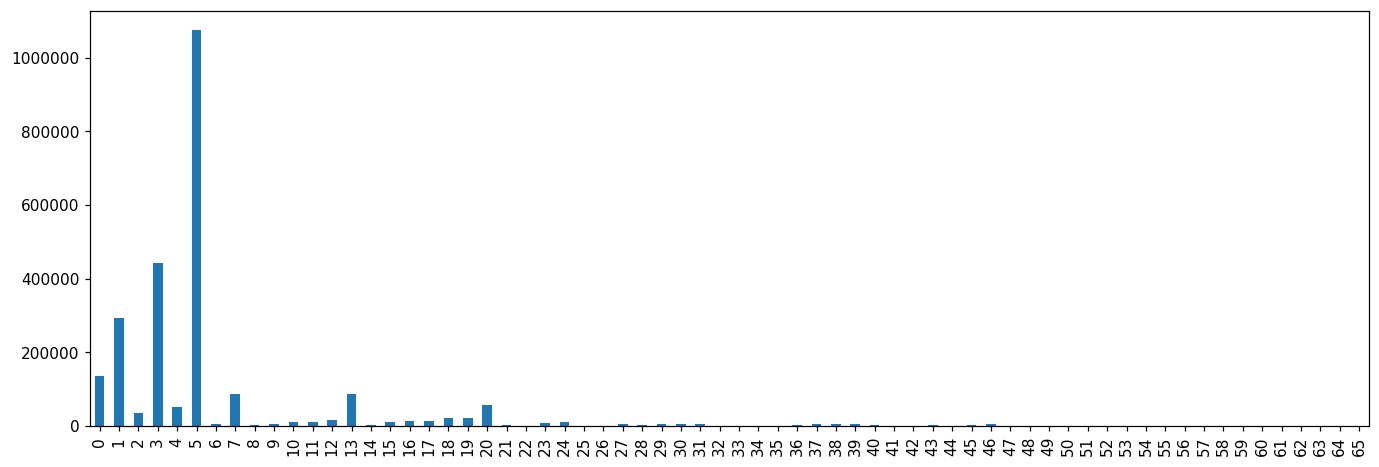

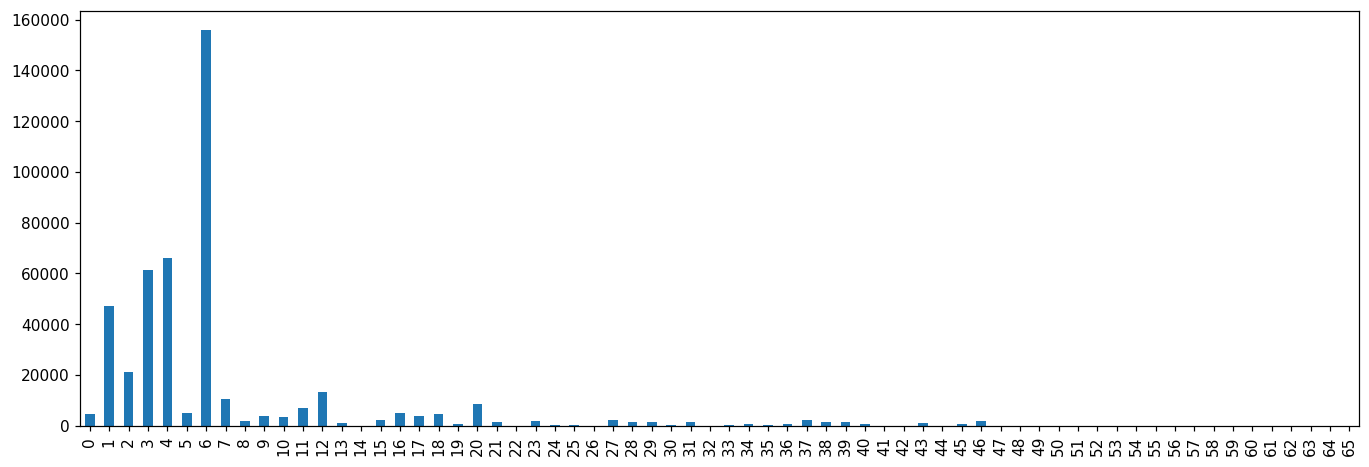

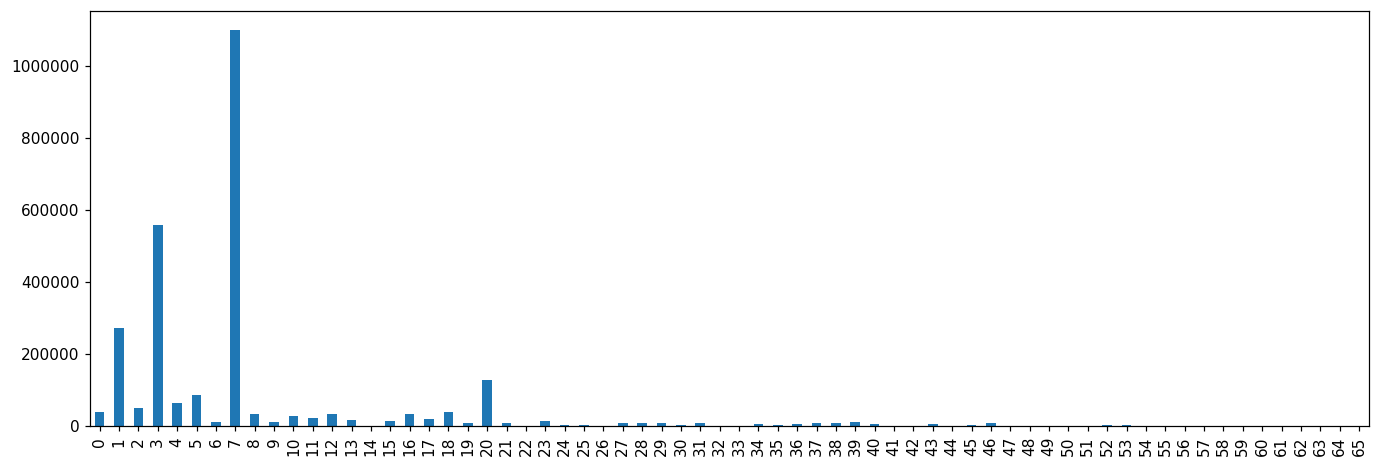

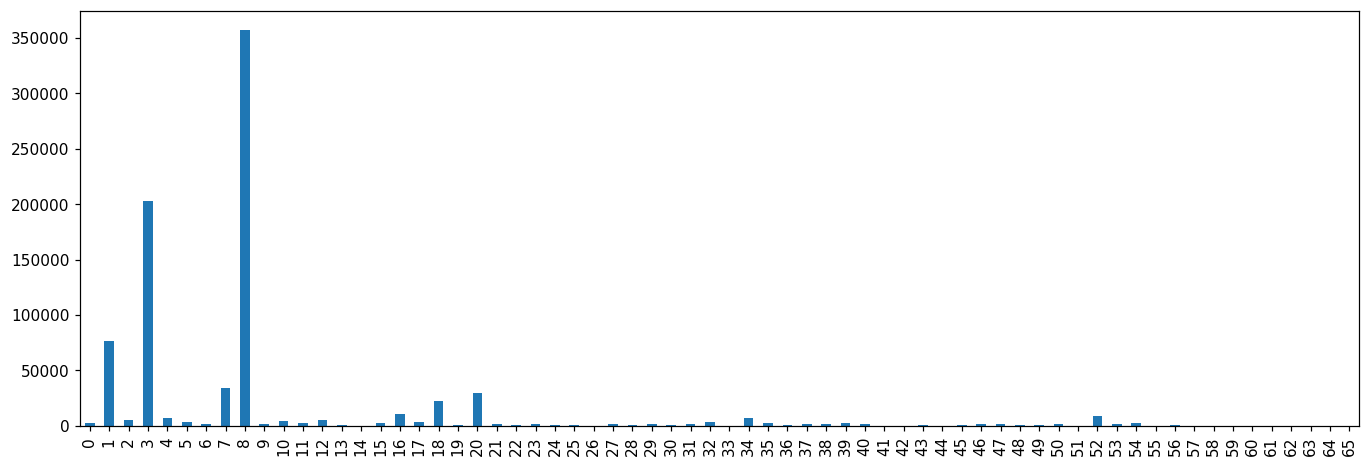

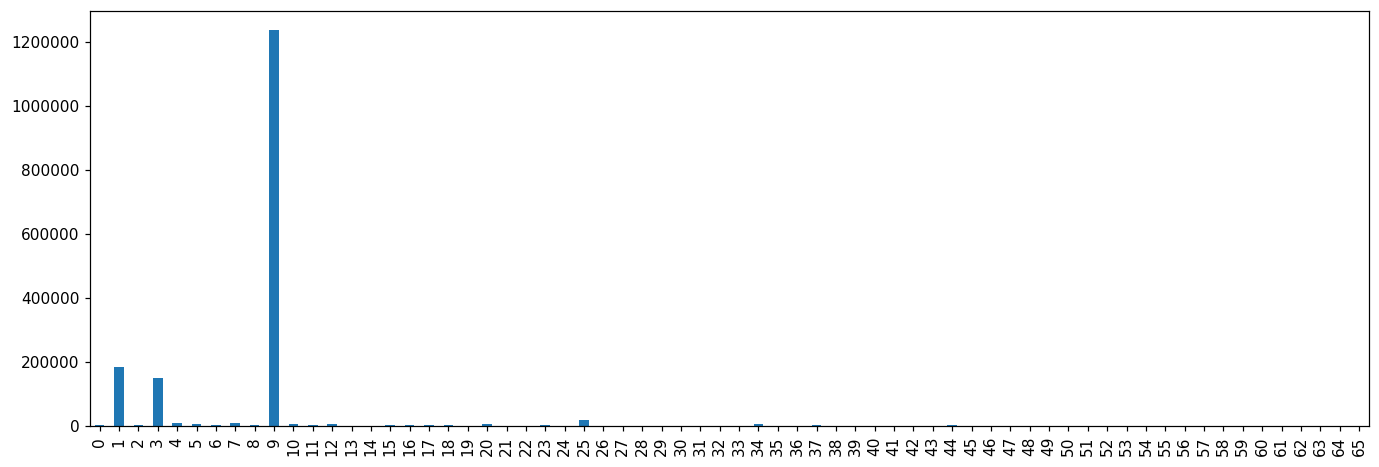

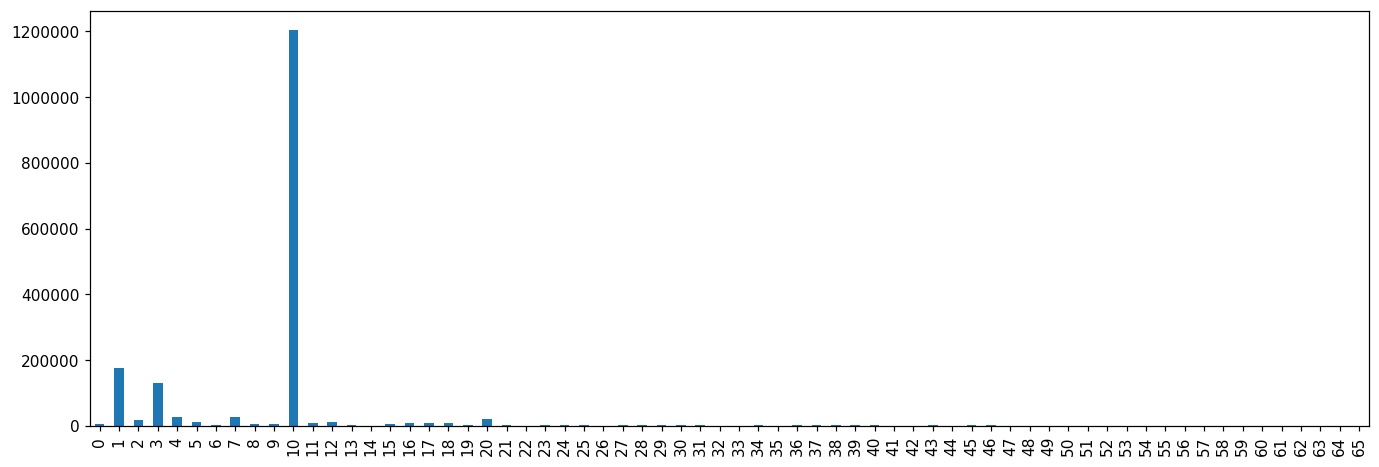

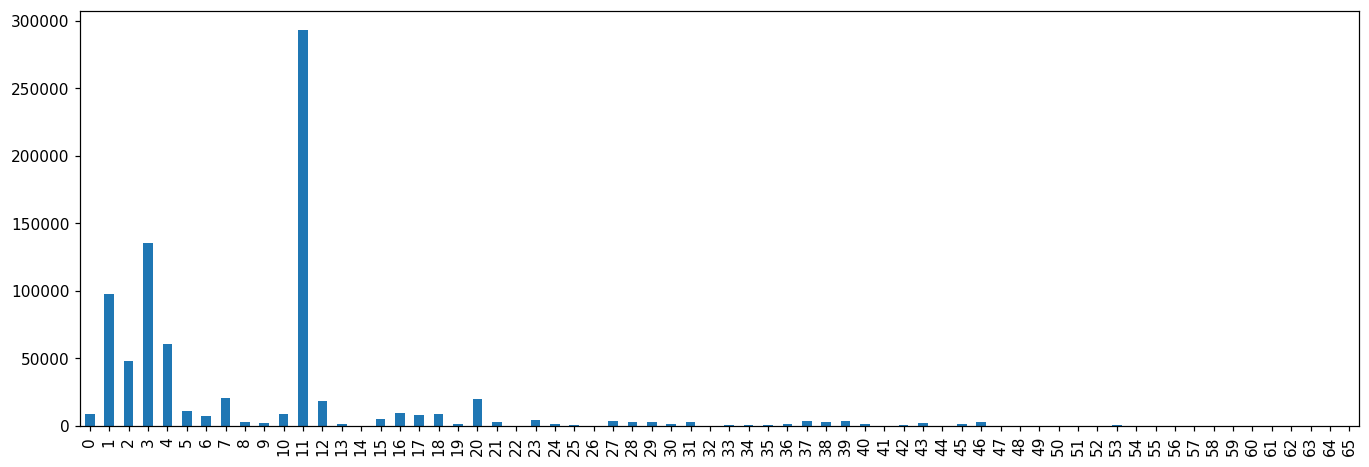

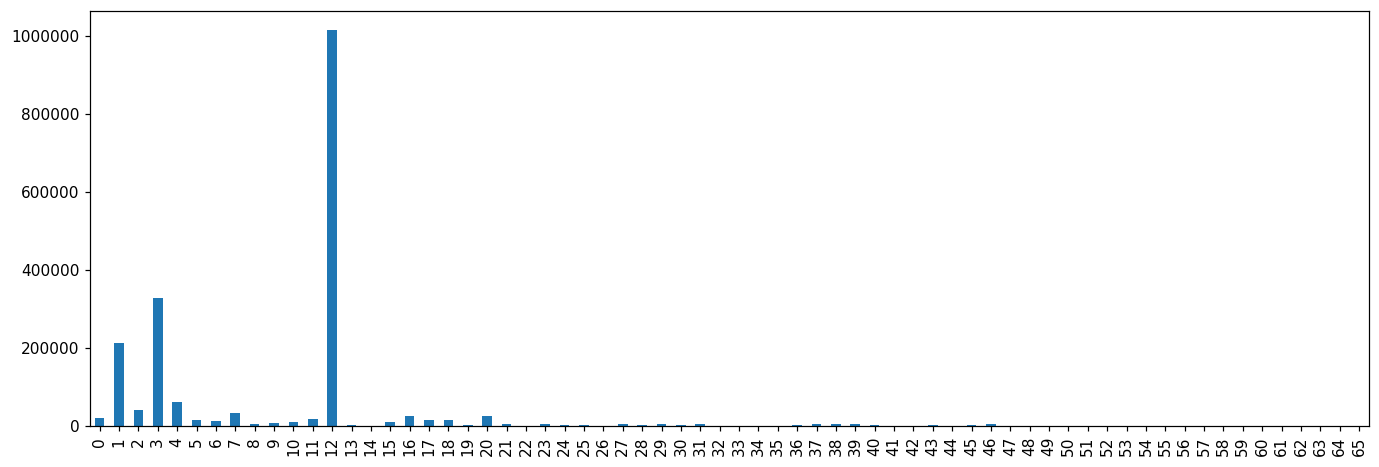

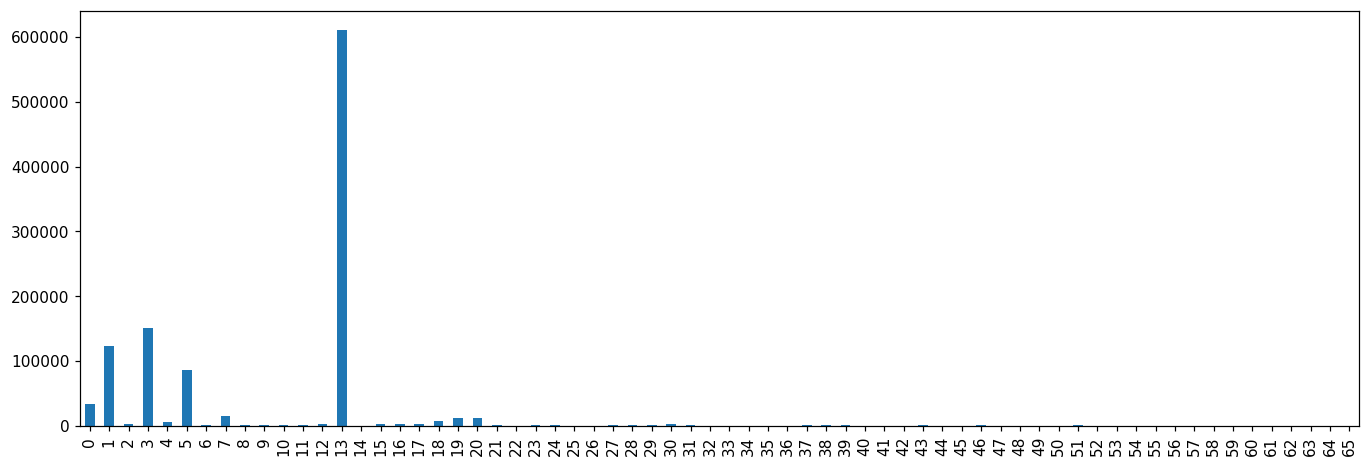

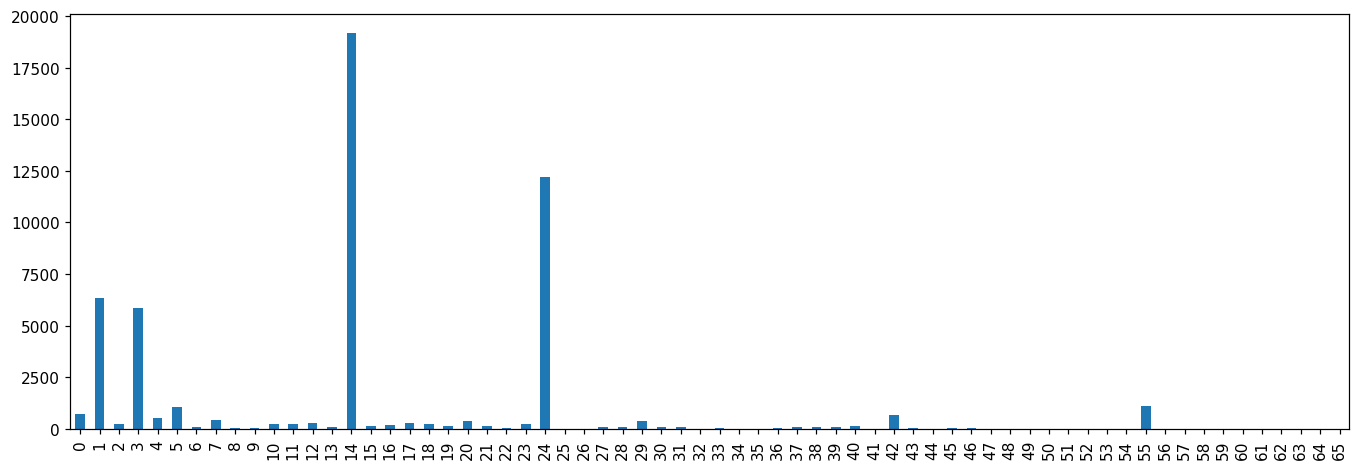

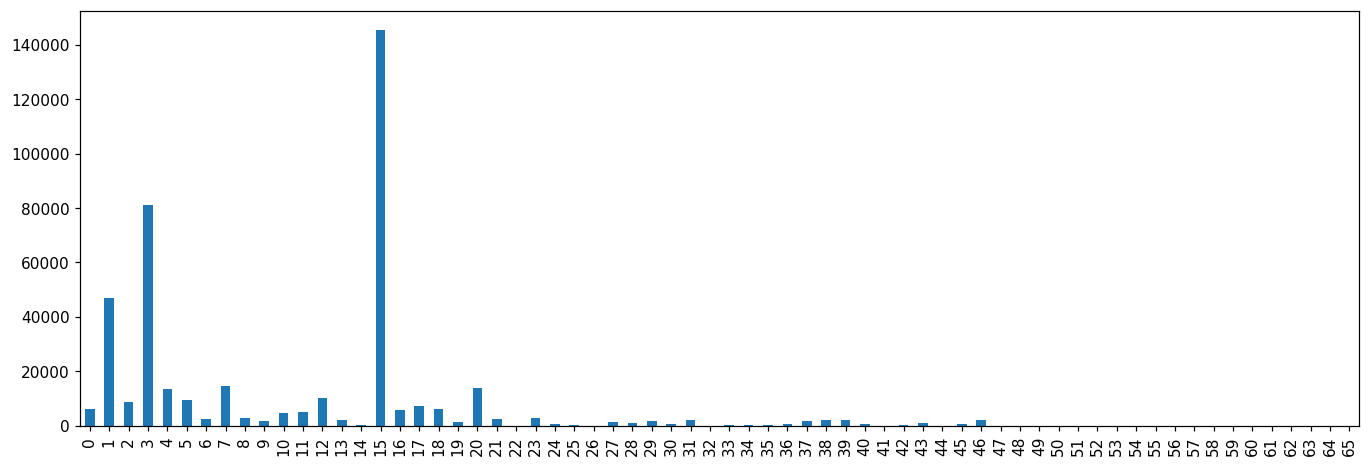

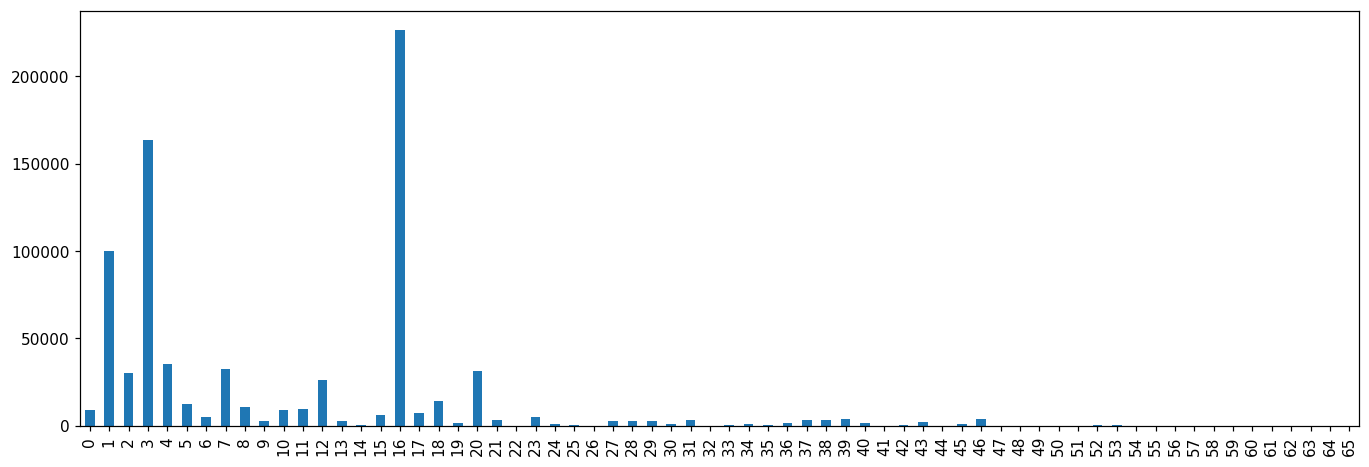

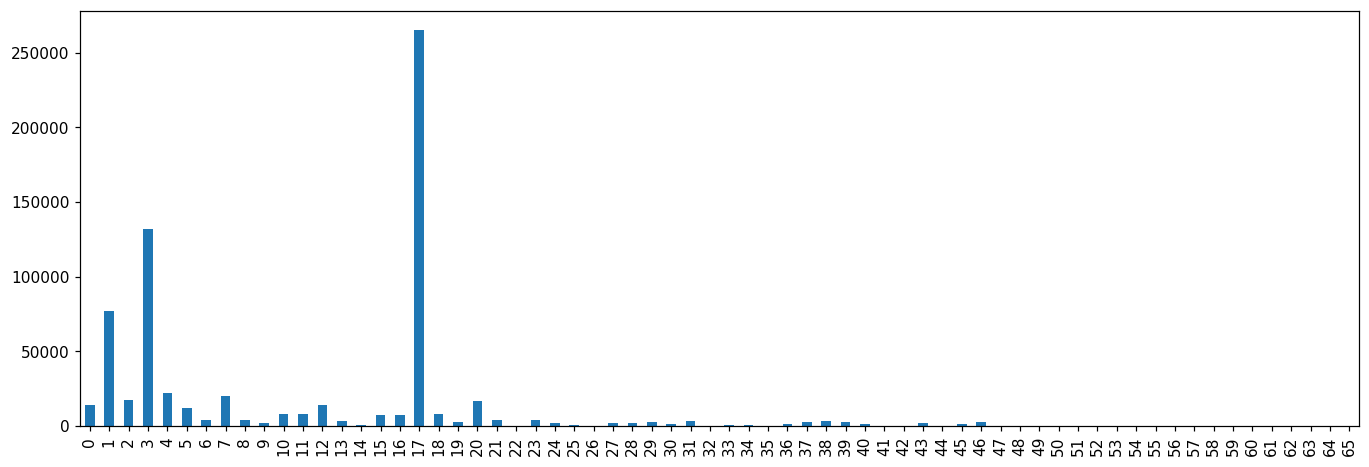

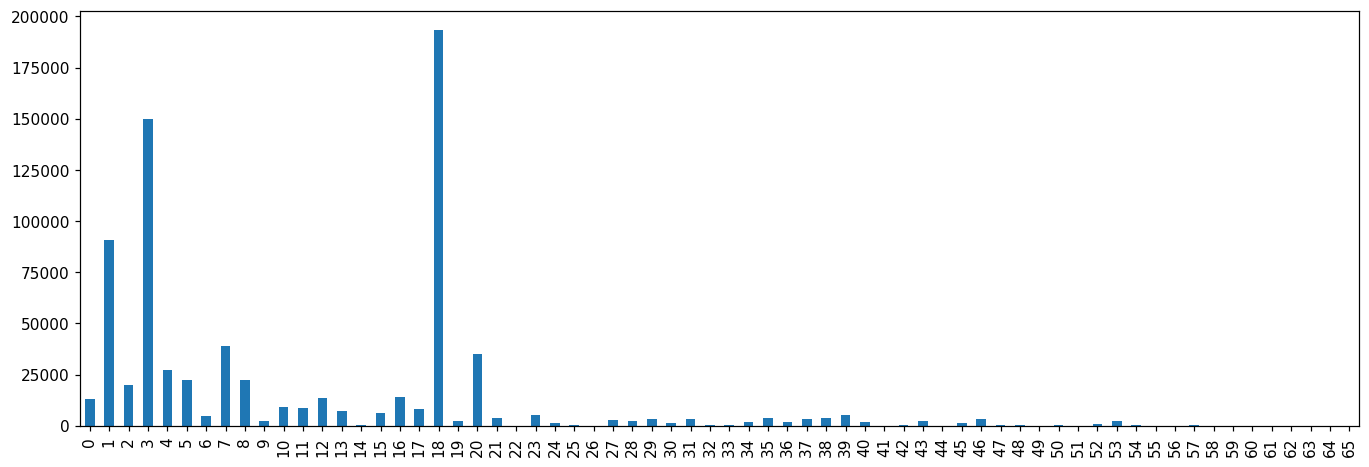

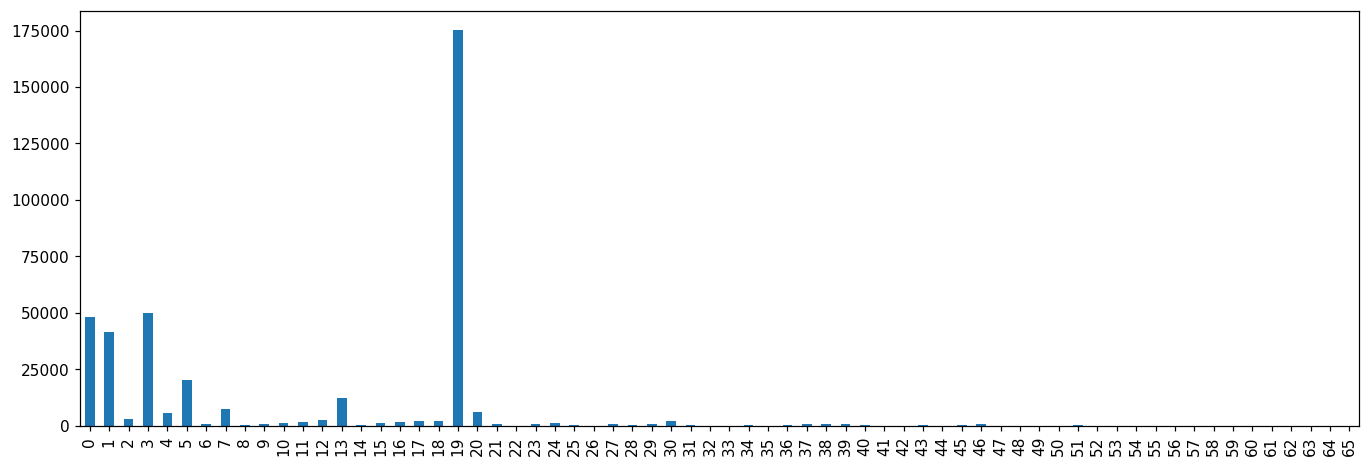

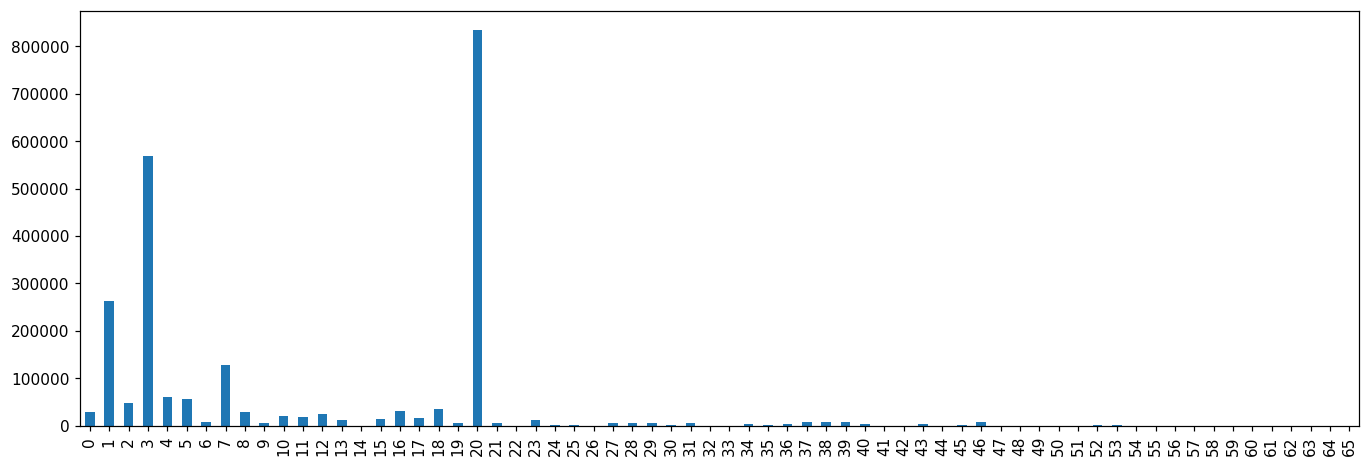

In [30]:
for language in subset_languages:
    plt.rcParams['figure.figsize'] = [15, 5]
    sum_df_language_know_language[language].index = languages
    sum_df_language_know_language[language].plot(kind='bar')
    plt.show()

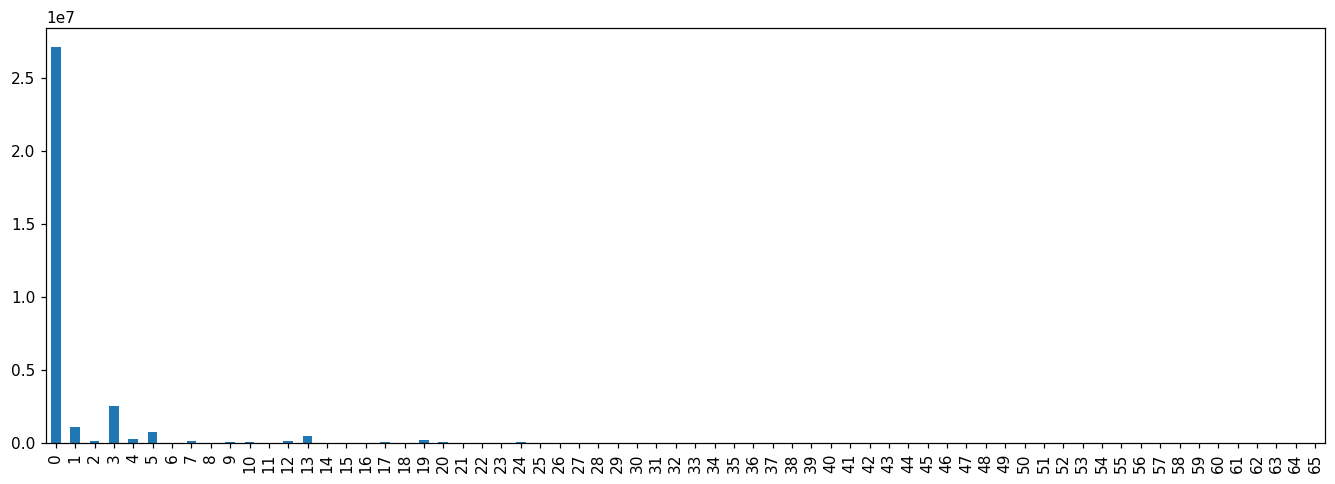

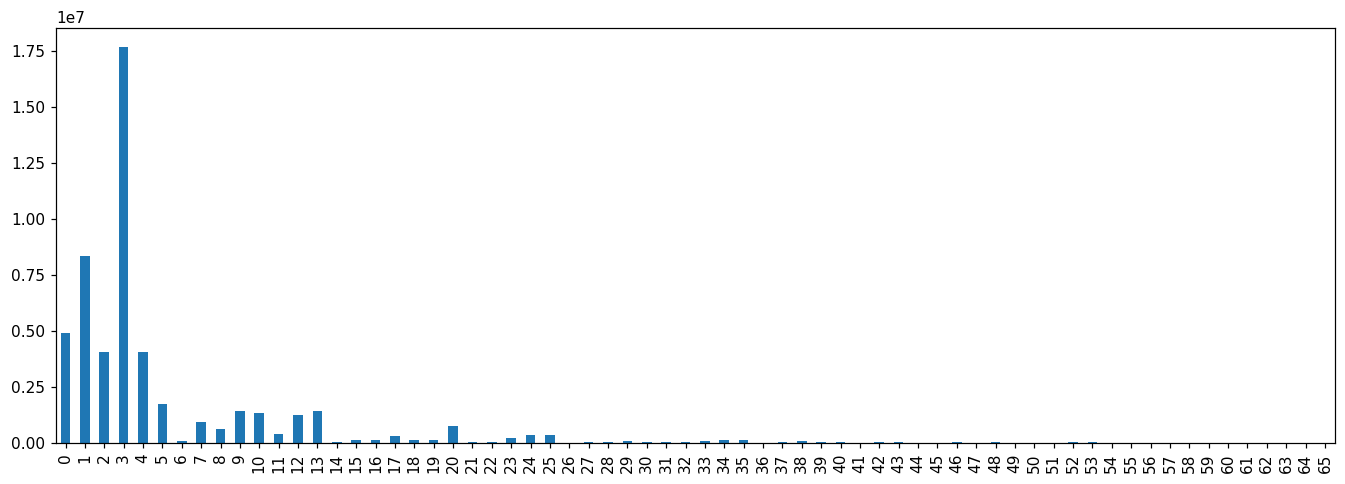

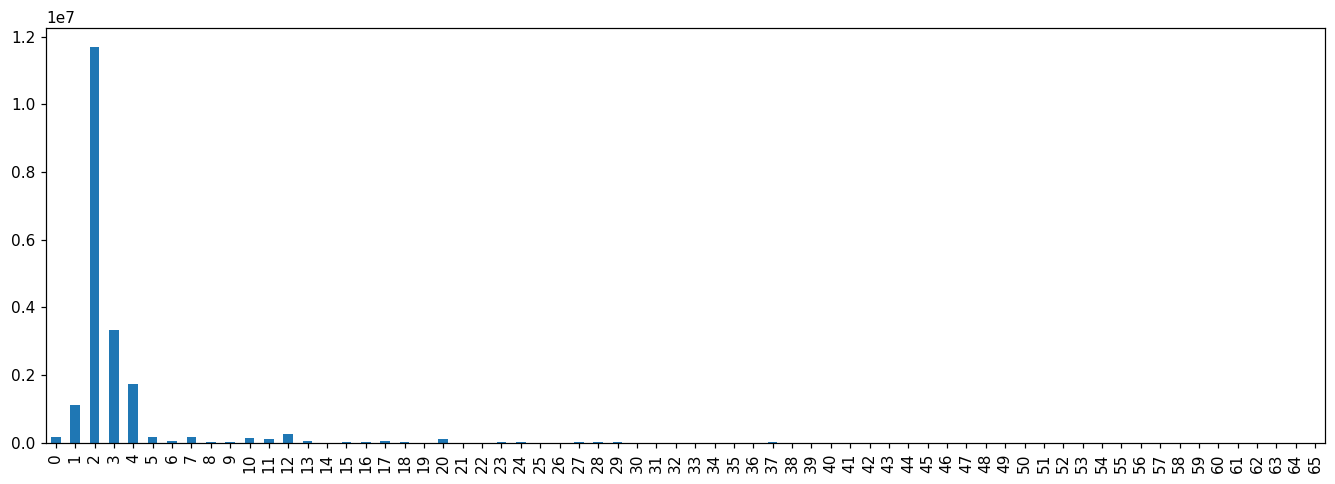

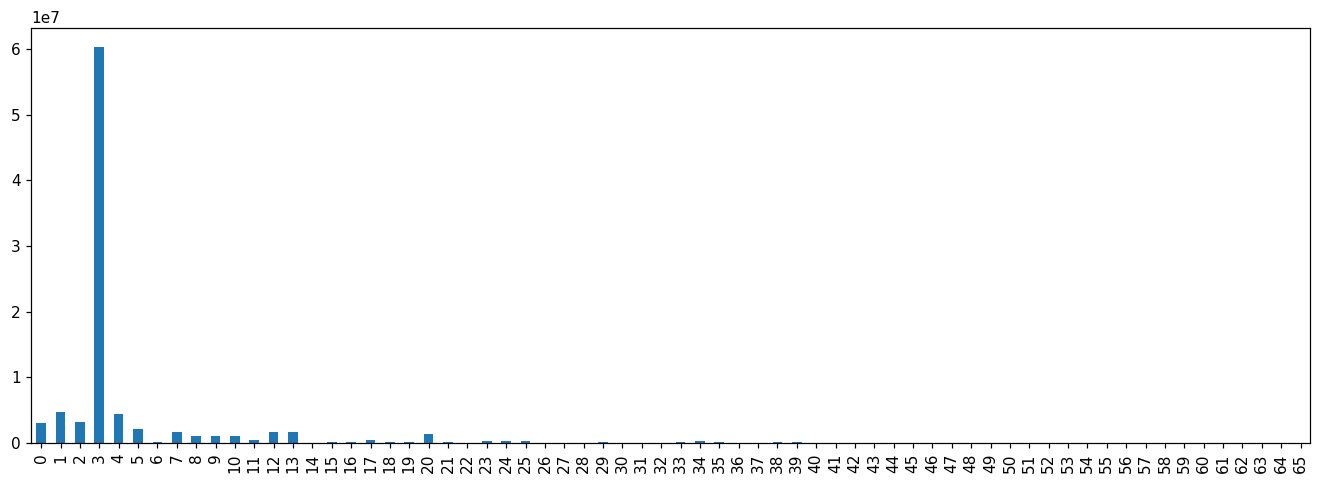

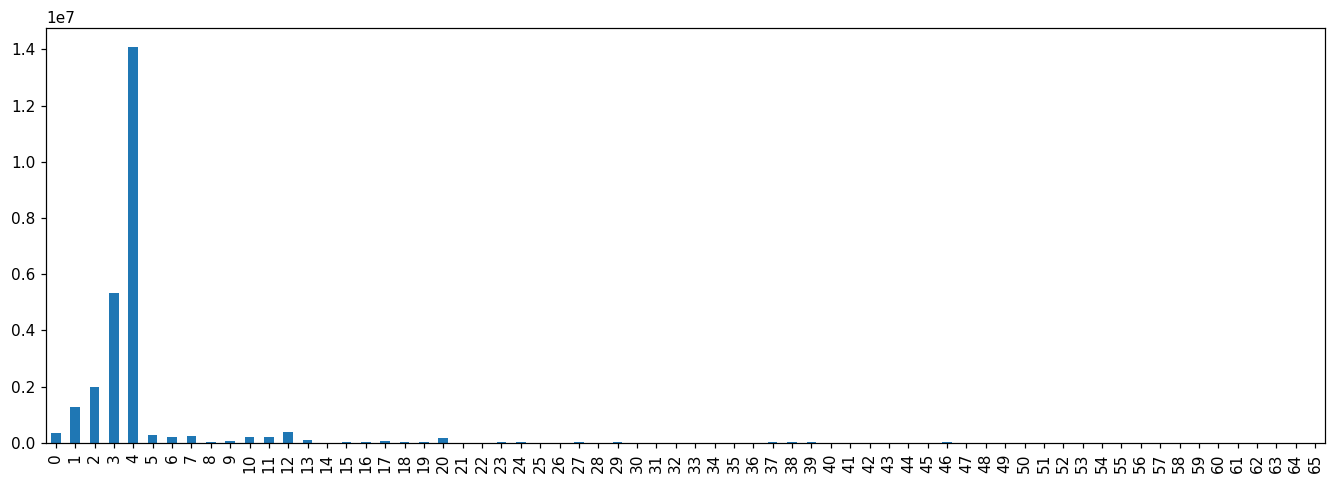

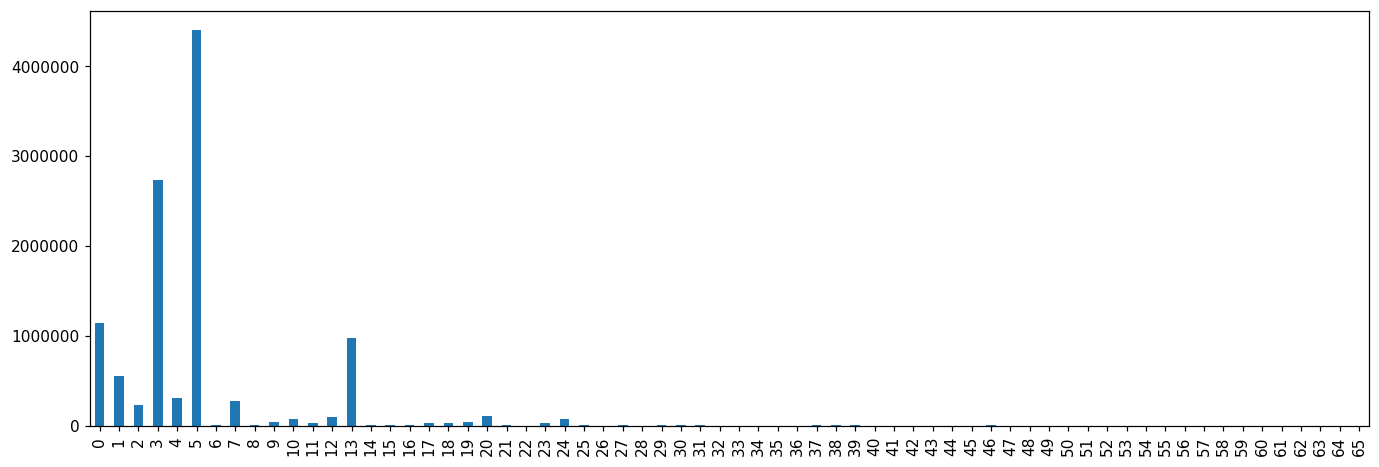

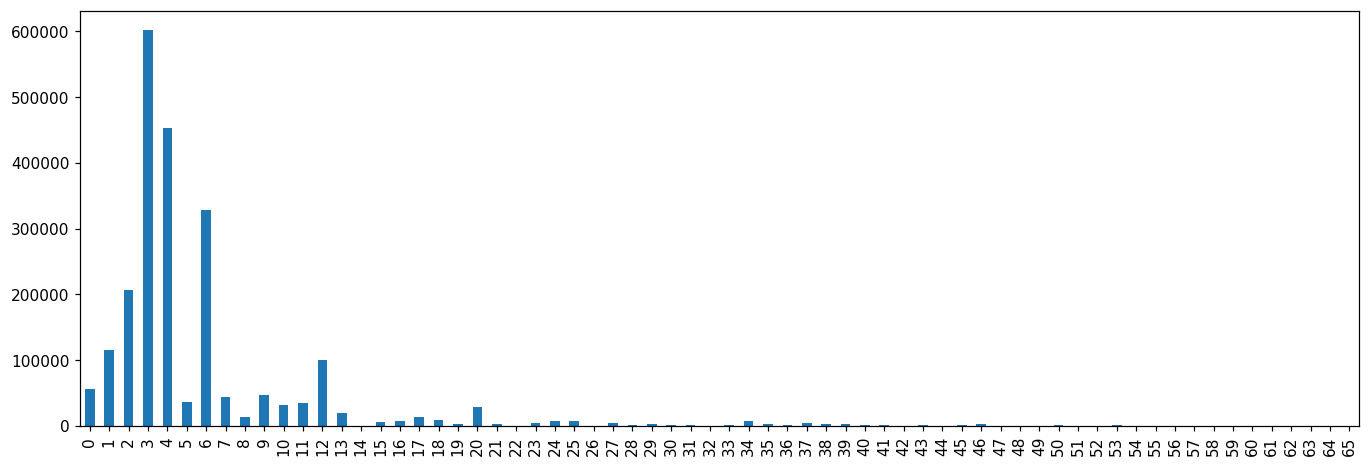

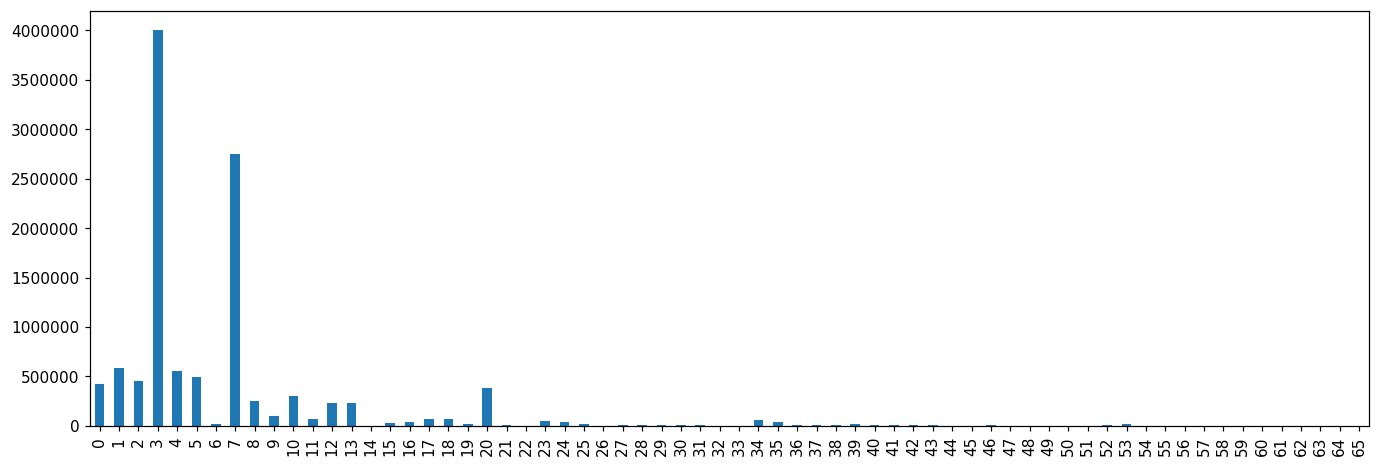

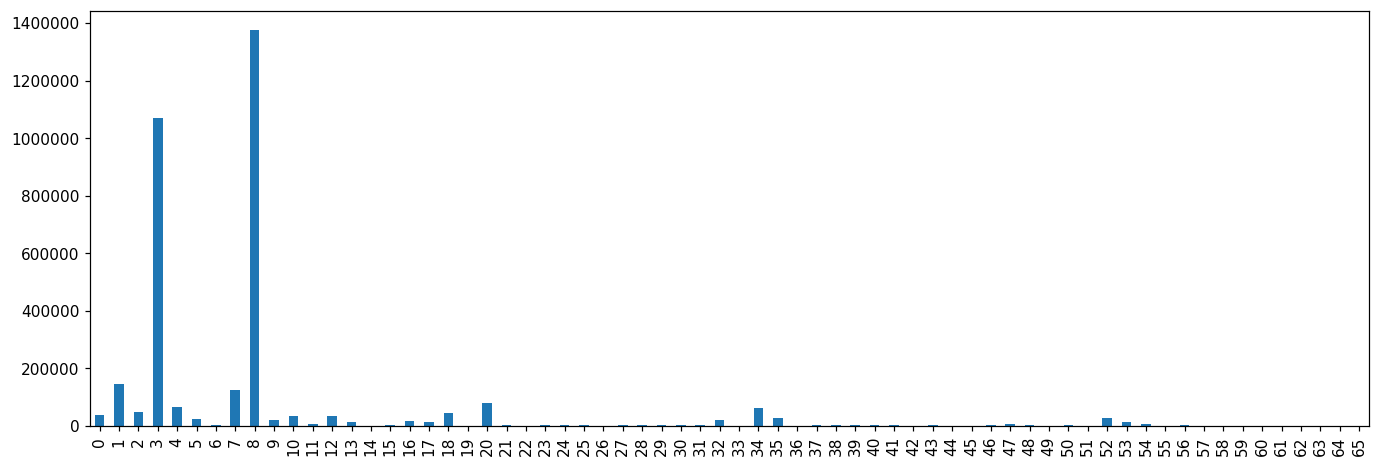

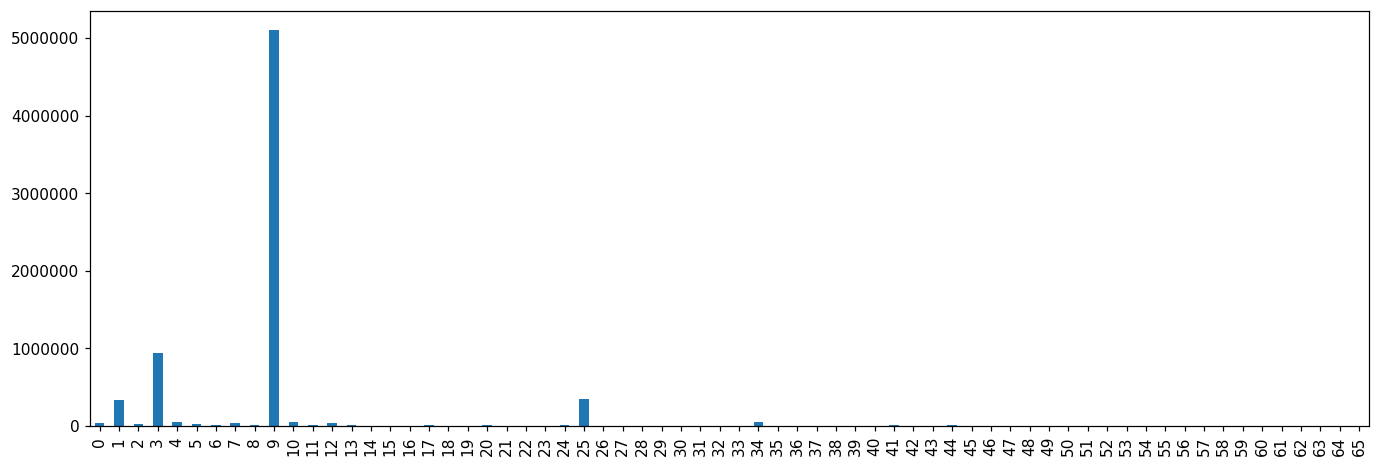

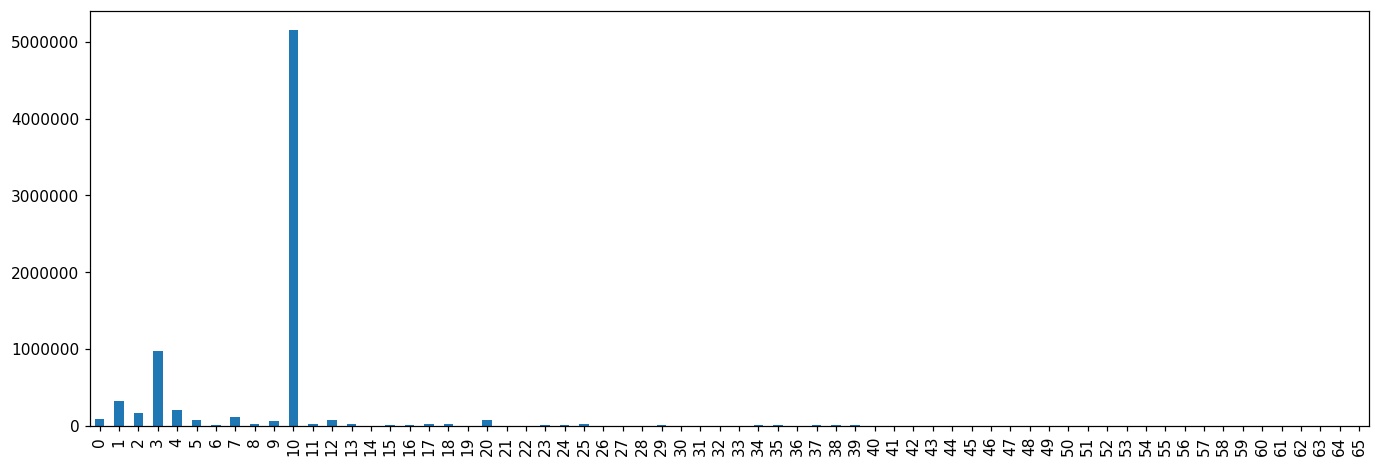

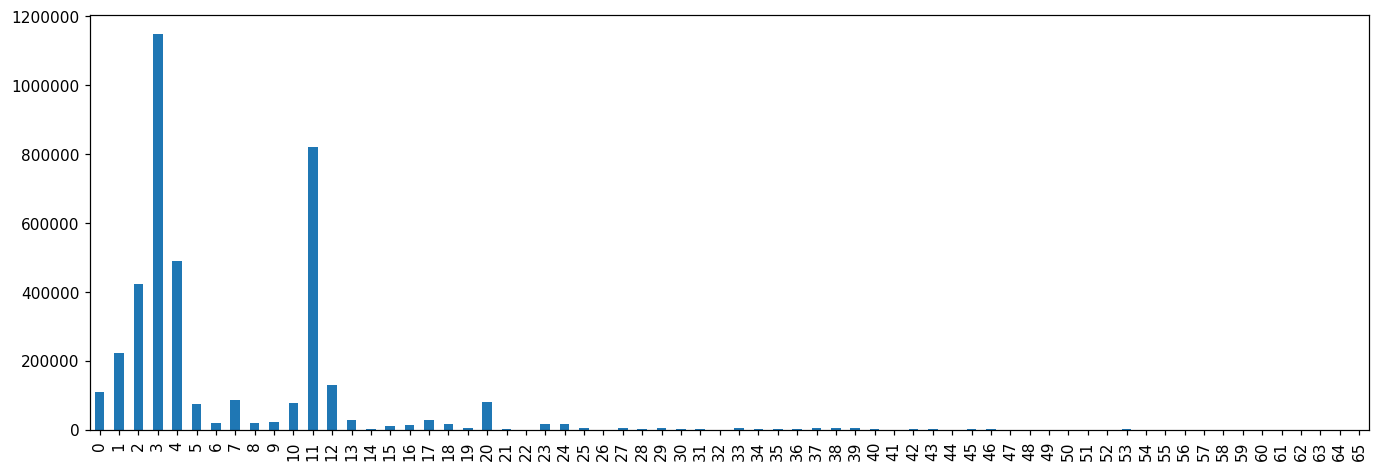

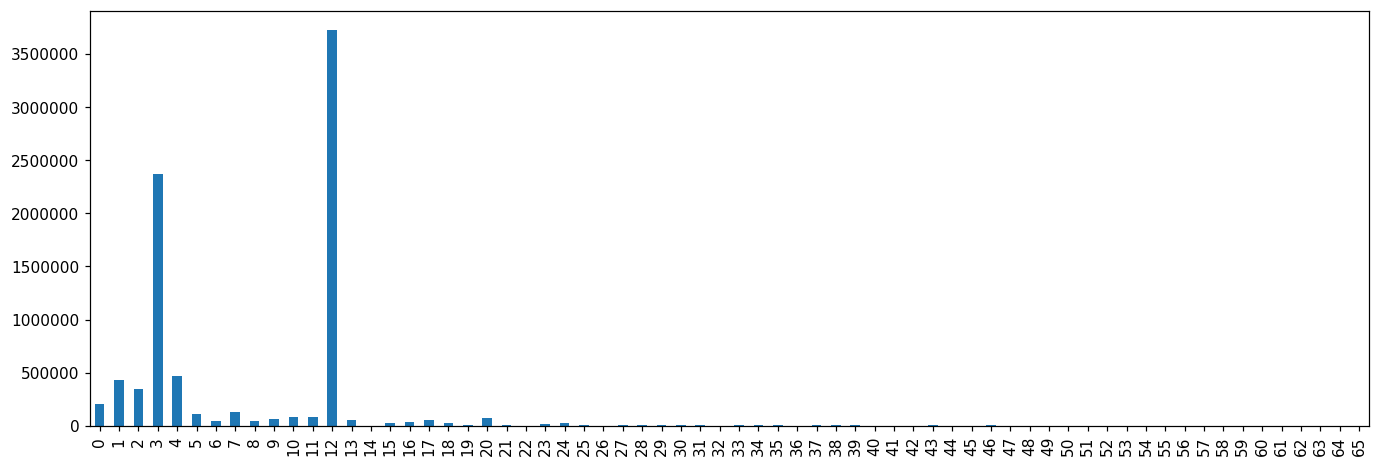

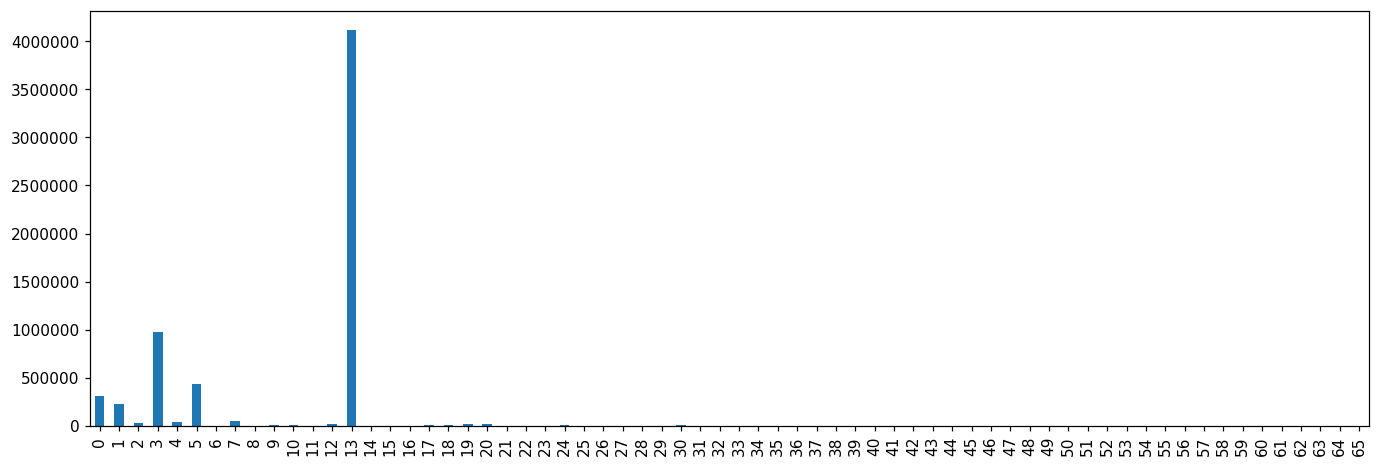

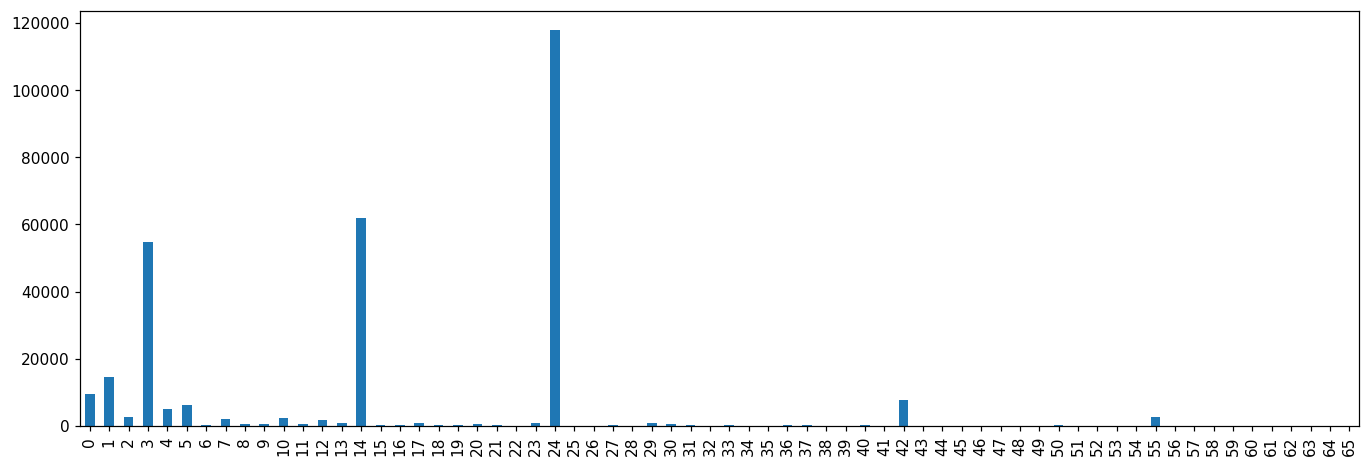

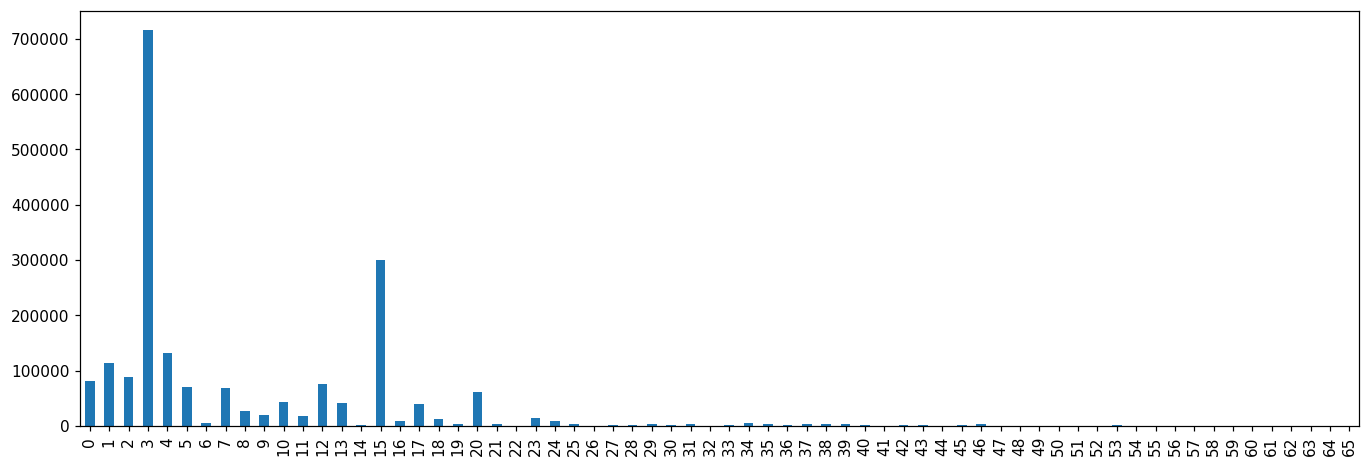

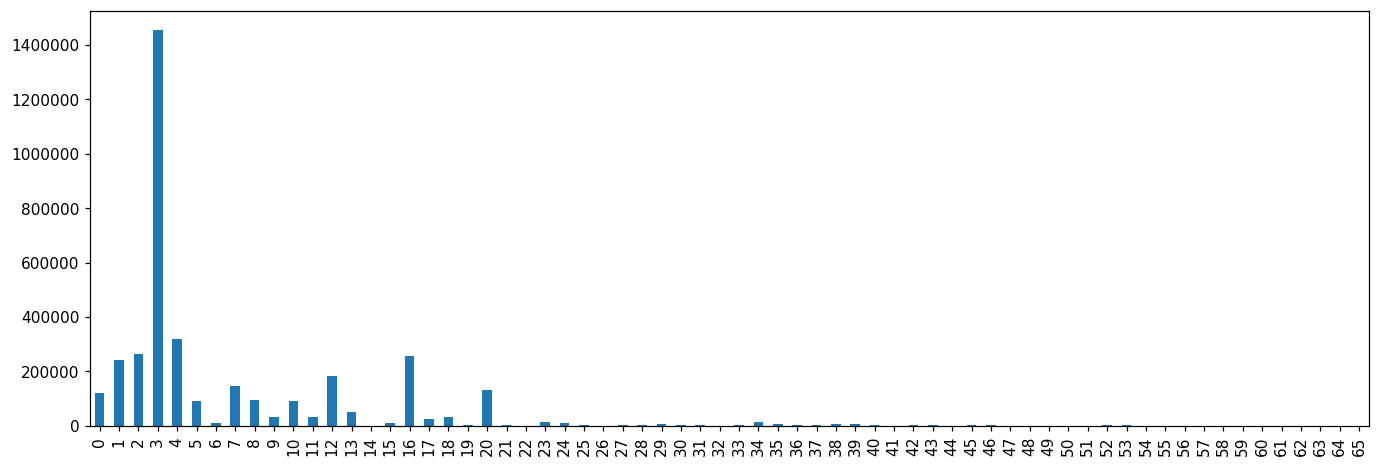

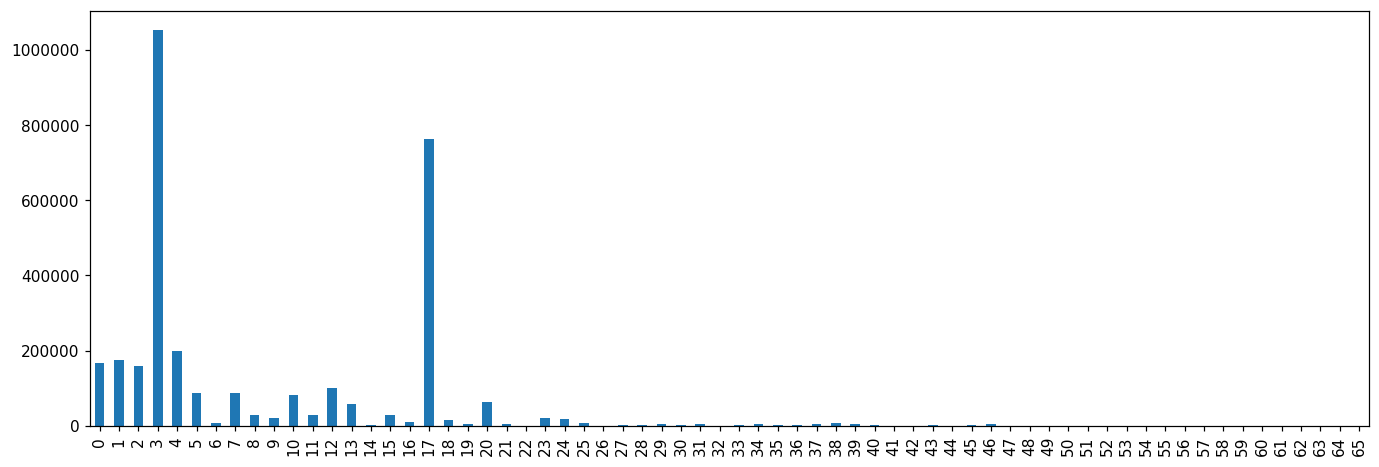

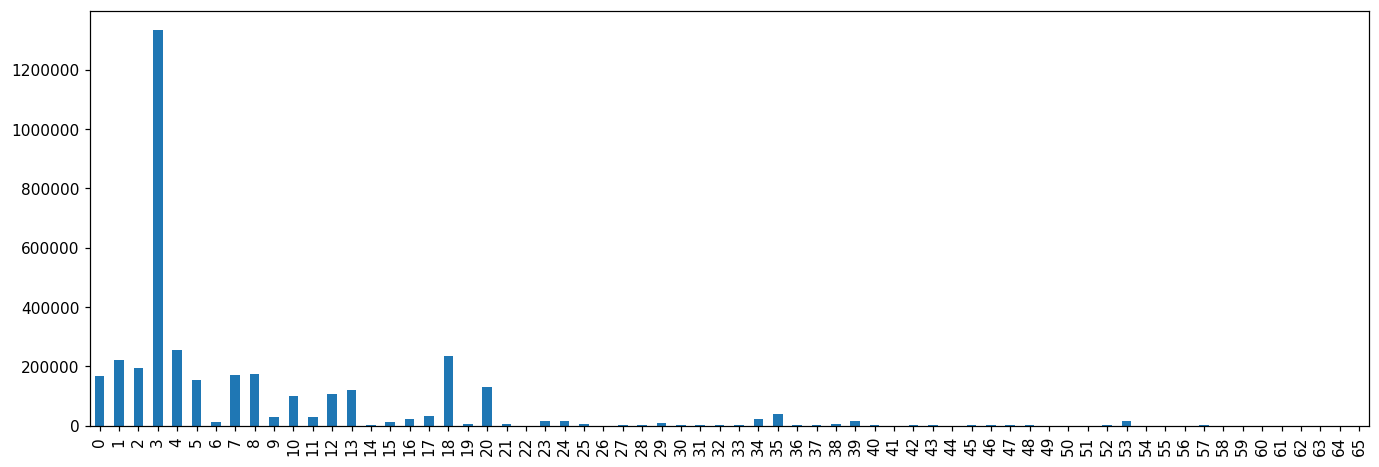

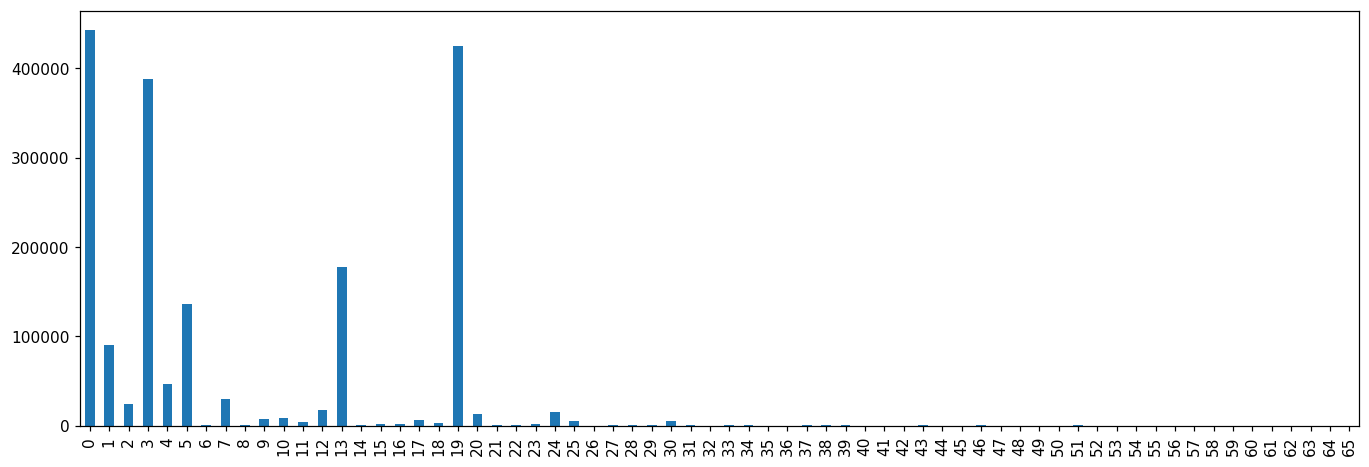

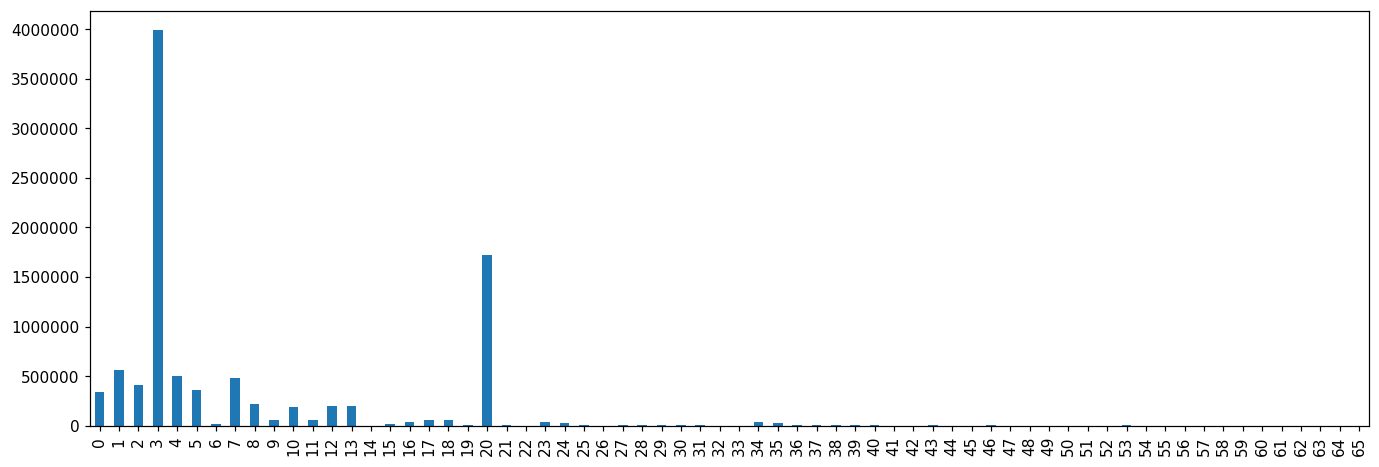

In [31]:
for language in subset_languages:
    plt.rcParams['figure.figsize'] = [15, 5]
    sum_df_language_count_occurence[language].index = languages
    sum_df_language_count_occurence[language].plot(kind='bar')
    plt.show()